# 군집분석

In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 폰트 파일 경로로 변경
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
df_origin = pd.read_csv('군집분석.csv')
df_origin

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,사립유치원정원,3개년 평균출생인구
0,종로구,사직동,23,1,2,5,2,6,1,954,...,25,0,2,2,38.73,101,1.0,0.0,119.0,30.0
1,종로구,부암동,2,0,0,6,0,0,1,150,...,20,0,2,2,29.92,127,2.0,0.0,216.0,24.7
2,종로구,평창동,6,0,0,6,1,3,6,175,...,66,0,1,1,20.78,123,1.0,0.0,98.0,66.3
3,용산구,한남동,21,0,0,2,1,1,10,364,...,114,1,0,1,44.03,145,2.0,34.0,0.0,119.3
4,성동구,왕십리2동,42,0,0,0,0,2,18,376,...,104,1,1,2,32.85,336,6.0,39.0,32.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,종로구,교남동,3,0,1,1,2,1,2,323,...,49,0,0,0,29.69,245,4.0,0.0,0.0,59.3
416,종로구,종로1·2·3·4가동,289,11,0,13,0,4,18,741,...,12,0,1,1,65.21,97,2.0,0.0,75.0,15.0
417,서초구,방배2동,1,0,0,0,1,6,5,694,...,99,0,0,0,28.31,298,5.0,0.0,0.0,101.0
418,강북구,미아동,7,1,1,1,3,5,7,347,...,48,0,0,0,45.69,198,3.0,0.0,0.0,45.3


In [3]:
# 실제 유의미하다고 판단하는 변수만 추출 
df_origin = df_origin[['자치구', '행정동', '유해업소수', '공원 수', '월평균소득금액', '0~9세', '2030_상주인구수', 
                        '3개년 평균출생인구', '1인가구 비율(%)', '공립보육시설정원', '공립보육시설수', '공립유치원정원', '공립']]

In [4]:
df = df_origin[df_origin['자치구'] == '광진구'].reset_index(drop = True)
df

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립
0,광진구,자양3동,5,2,4391943,1958,8290,166.3,21.22,239,3.0,46.0,1
1,광진구,구의2동,2,2,2928061,1308,7401,106.7,29.16,152,3.0,0.0,0
2,광진구,화양동,11,4,2490675,284,12826,44.7,76.43,120,2.0,61.0,1
3,광진구,군자동,11,2,2626714,645,7647,73.0,54.19,241,4.0,0.0,0
4,광진구,중곡1동,11,1,2558983,565,5612,71.3,44.68,147,2.0,0.0,0
5,광진구,중곡2동,9,1,2576212,830,7524,82.3,39.31,208,4.0,0.0,0
6,광진구,중곡3동,7,1,2409648,605,5373,74.0,41.61,234,3.0,52.0,1
7,광진구,중곡4동,0,2,2542721,1015,8900,104.3,31.41,171,3.0,30.0,1
8,광진구,능동,6,0,2870468,432,4766,53.0,53.79,175,4.0,0.0,0
9,광진구,구의1동,8,1,2706661,859,8632,86.0,50.82,175,2.0,0.0,0


In [5]:
df.columns

Index(['자치구', '행정동', '유해업소수', '공원 수', '월평균소득금액', '0~9세', '2030_상주인구수',
       '3개년 평균출생인구', '1인가구 비율(%)', '공립보육시설정원', '공립보육시설수', '공립유치원정원', '공립'],
      dtype='object')

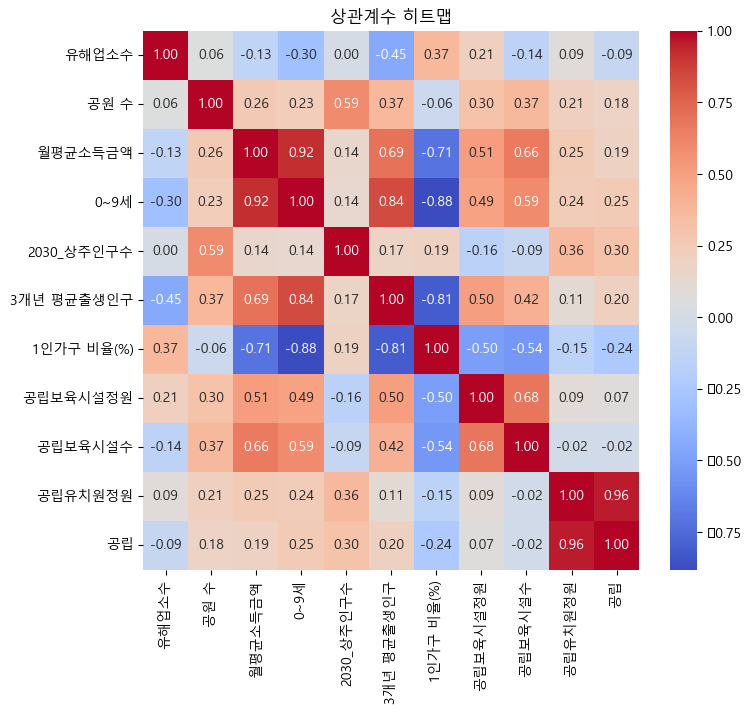

In [6]:
# 상관계수 확인
correlation_matrix = df.corr()

plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관계수 히트맵')
plt.show()

공립유치원 및 보육시설이 들어오기 적합한곳?  
출생인구 및 다인 가구가 많고, 소득금액이 적은 취약지역
- 평균 출생인구, 1인가구 비율, 월평균 소득금액 기준으로 군집분석 

## Kmeans 군집분석(광진구)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
df_km = df[['월평균소득금액', '1인가구 비율(%)', '3개년 평균출생인구']]

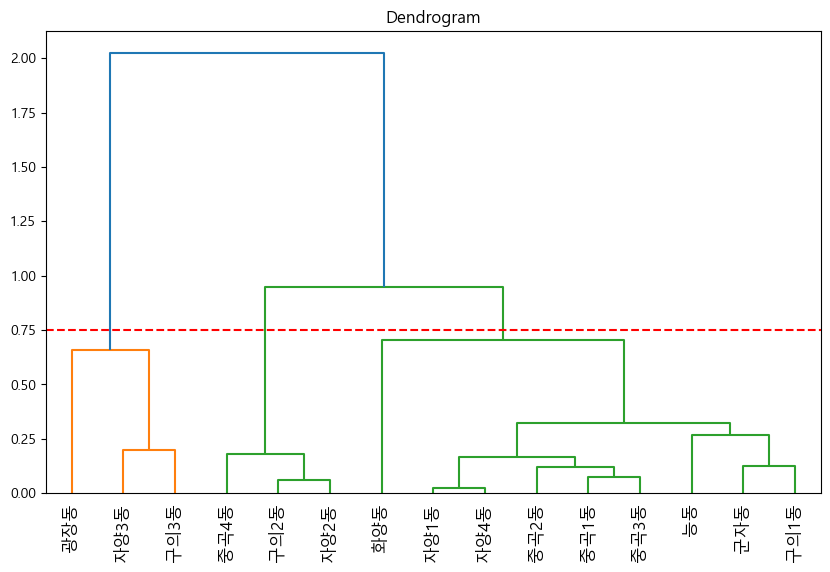

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler

df_km_dd = df_km.copy()
df_km_dd['행정동'] = df['행정동']
df_km_dd.set_index('행정동', inplace=True)

# Min-Max 정규화 수행
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_km_dd)

df_normalized = pd.DataFrame(normalized_data, columns=df_km_dd.columns, index=df_km_dd.index)

# 계층적 군집 분석 수행
clusters = linkage(df_normalized, 
                   method = 'ward',
                   metric = 'euclidean')

# 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(Z = clusters, labels=df_km_dd.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.axhline(y = 0.75, color = 'r', linestyle = '--')
plt.show()

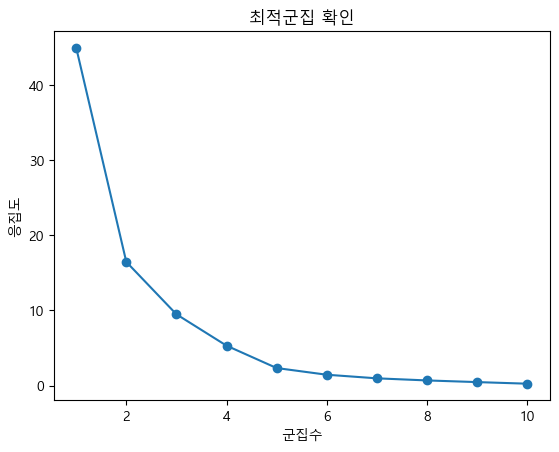

In [10]:
# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_km)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('군집수')
plt.ylabel('응집도')
plt.title('최적군집 확인')
plt.show()

In [11]:
# K-means 클러스터링
k = 4  # 선택한 K값
kmeans = KMeans(n_clusters=k, random_state=42)
df_km['cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터별 통계 정보 출력
cluster_stats = df_km.groupby('cluster').mean()
cluster_stats

,월평균소득금액,1인가구 비율(%),3개년 평균출생인구
cluster,,,
0,2.663202e+06,46.68,72.862500
1,4.582739e+06,20.89,143.666667
2,2.829870e+06,30.35,107.766667
3,2.490675e+06,76.43,44.700000


In [12]:
df_km.loc[df_km['cluster'] == 3, 'cluster'] = '4순위'
df_km.loc[df_km['cluster'] == 2, 'cluster'] = '1순위'
df_km.loc[df_km['cluster'] == 1, 'cluster'] = '3순위'
df_km.loc[df_km['cluster'] == 0, 'cluster'] = '2순위'

In [13]:
df_km['행정동'] = df['행정동']

In [14]:
df_km

,월평균소득금액,1인가구 비율(%),3개년 평균출생인구,cluster,행정동
0,4391943,21.22,166.3,3순위,자양3동
1,2928061,29.16,106.7,1순위,구의2동
2,2490675,76.43,44.7,4순위,화양동
3,2626714,54.19,73.0,2순위,군자동
4,2558983,44.68,71.3,2순위,중곡1동
5,2576212,39.31,82.3,2순위,중곡2동
6,2409648,41.61,74.0,2순위,중곡3동
7,2542721,31.41,104.3,1순위,중곡4동
8,2870468,53.79,53.0,2순위,능동
9,2706661,50.82,86.0,2순위,구의1동


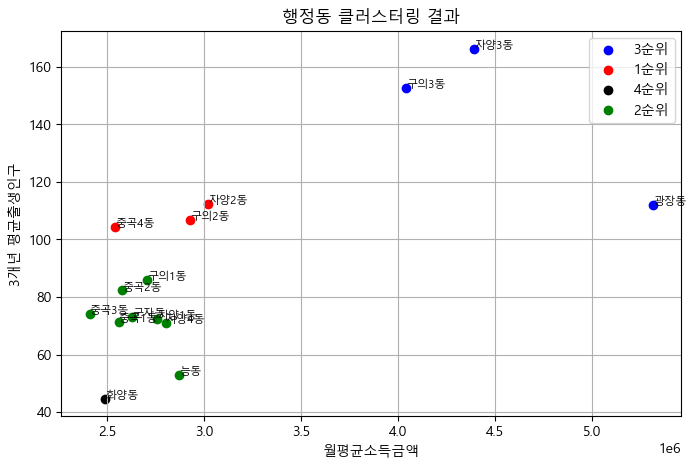

In [15]:
colors = ['blue', 'red', 'black', 'green']

plt.figure(figsize=(8, 5))

for cluster, color in zip(df_km['cluster'].unique(), colors):
    plt.scatter(df_km[df_km['cluster'] == cluster]['월평균소득금액'], 
                df_km[df_km['cluster'] == cluster]['3개년 평균출생인구'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_km)):
    plt.text(df_km['월평균소득금액'][i], df_km['3개년 평균출생인구'][i], df_km['행정동'][i], fontsize=8)

plt.xlabel('월평균소득금액')
plt.ylabel('3개년 평균출생인구')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

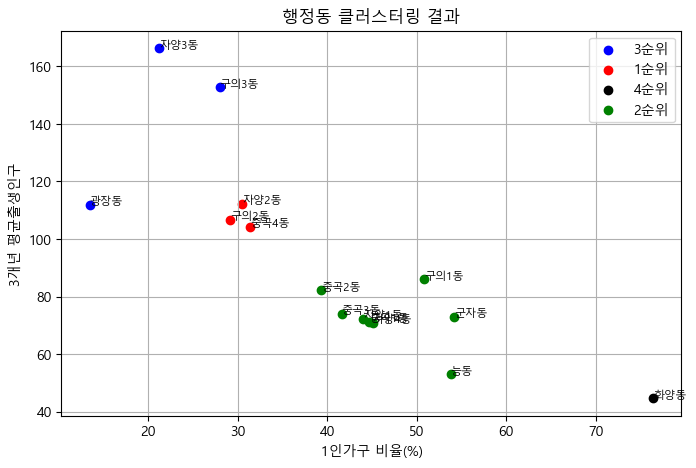

In [16]:
plt.figure(figsize=(8, 5))

for cluster, color in zip(df_km['cluster'].unique(), colors):
    plt.scatter(df_km[df_km['cluster'] == cluster]['1인가구 비율(%)'], 
                df_km[df_km['cluster'] == cluster]['3개년 평균출생인구'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_km)):
    plt.text(df_km['1인가구 비율(%)'][i], df_km['3개년 평균출생인구'][i], df_km['행정동'][i], fontsize=8)

plt.xlabel('1인가구 비율(%)')
plt.ylabel('3개년 평균출생인구')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

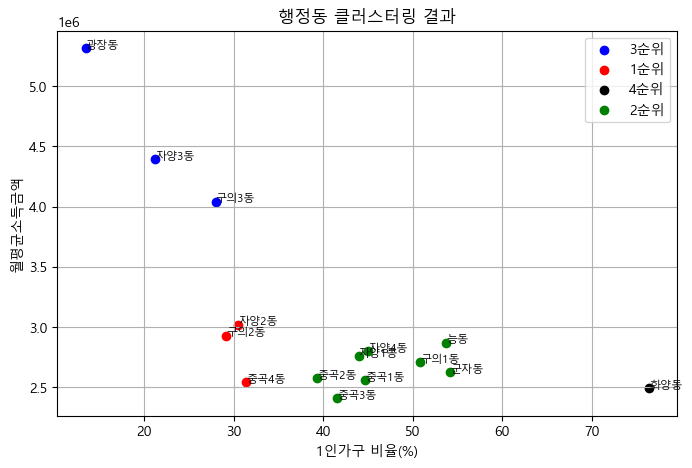

In [17]:
plt.figure(figsize=(8, 5))

for cluster, color in zip(df_km['cluster'].unique(), colors):
    plt.scatter(df_km[df_km['cluster'] == cluster]['1인가구 비율(%)'], 
                df_km[df_km['cluster'] == cluster]['월평균소득금액'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_km)):
    plt.text(df_km['1인가구 비율(%)'][i], df_km['월평균소득금액'][i], df_km['행정동'][i], fontsize=8)

plt.xlabel('1인가구 비율(%)')
plt.ylabel('월평균소득금액')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

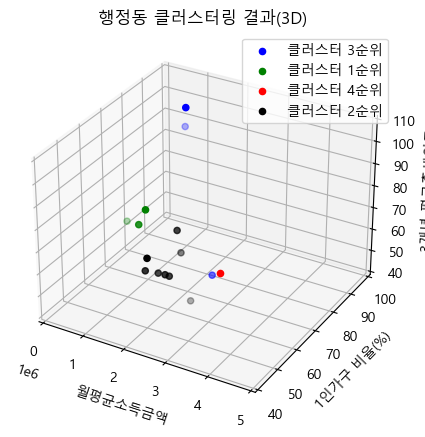

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 생성
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'green', 'red', 'black']
for cluster, color in zip(df_km['cluster'].unique(), colors):
    ax.scatter(df_km[df_km['cluster'] == cluster]['월평균소득금액'], 
               df_km[df_km['cluster'] == cluster]['1인가구 비율(%)'], 
               df_km[df_km['cluster'] == cluster]['3개년 평균출생인구'],
               color=color,
               label=f'클러스터 {cluster}')

# 각 축에 라벨 추가
ax.set_xlabel('월평균소득금액')
ax.set_ylabel('1인가구 비율(%)')
ax.set_zlabel('3개년 평균출생인구')

# 축범위 설정
ax.set_xlim(0, 5000000)  
ax.set_ylim(40, 100)  
ax.set_zlim(40, 110)  

plt.title('행정동 클러스터링 결과(3D)')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_values = silhouette_samples(scaled_features, df_km['cluster'])

# 개별 실루엣 계수 
for i, silhouette in enumerate(silhouette_values):
    print(f"{df_km['행정동'][i]} 실루엣 계수: {round(silhouette,3)}")
print("")
# 전체 실루엣 계수
print(f"전체 실루엣 계수: {round(silhouette_score(scaled_features, df_km['cluster']), 3)}")


자양3동 실루엣 계수: 0.477
구의2동 실루엣 계수: 0.776
화양동 실루엣 계수: 0.0
군자동 실루엣 계수: 0.581
중곡1동 실루엣 계수: 0.67
중곡2동 실루엣 계수: 0.307
중곡3동 실루엣 계수: 0.537
중곡4동 실루엣 계수: 0.601
능동 실루엣 계수: 0.387
구의1동 실루엣 계수: 0.542
구의3동 실루엣 계수: 0.27
광장동 실루엣 계수: 0.344
자양1동 실루엣 계수: 0.652
자양2동 실루엣 계수: 0.748
자양4동 실루엣 계수: 0.661

전체 실루엣 계수: 0.504


In [20]:
df_km.sort_values(by='cluster')

,월평균소득금액,1인가구 비율(%),3개년 평균출생인구,cluster,행정동
1,2928061,29.16,106.7,1순위,구의2동
7,2542721,31.41,104.3,1순위,중곡4동
13,3018829,30.48,112.3,1순위,자양2동
3,2626714,54.19,73.0,2순위,군자동
4,2558983,44.68,71.3,2순위,중곡1동
5,2576212,39.31,82.3,2순위,중곡2동
6,2409648,41.61,74.0,2순위,중곡3동
8,2870468,53.79,53.0,2순위,능동
9,2706661,50.82,86.0,2순위,구의1동
12,2756172,43.98,72.3,2순위,자양1동


In [21]:
# df_km.to_csv('../data/우선순위추가.csv',index=False)

## kmeans 군집분석(서울 전체)

In [22]:
df_origin
df_origin.head()

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립
0,종로구,사직동,23,6,5039456,462,2476,30.0,38.73,101,1.0,0.0,0
1,종로구,부암동,2,0,3661725,381,2586,24.7,29.92,127,2.0,0.0,0
2,종로구,평창동,6,3,4544046,996,4740,66.3,20.78,123,1.0,0.0,0
3,용산구,한남동,21,1,4397761,1027,6364,119.3,44.03,145,2.0,34.0,1
4,성동구,왕십리2동,42,2,3487691,1053,5333,115.0,32.85,336,6.0,39.0,1


In [23]:
df1 = df_origin[['월평균소득금액', '1인가구 비율(%)', '3개년 평균출생인구']]
df1

,월평균소득금액,1인가구 비율(%),3개년 평균출생인구
0,5039456,38.73,30.0
1,3661725,29.92,24.7
2,4544046,20.78,66.3
3,4397761,44.03,119.3
4,3487691,32.85,115.0
...,...,...,...
415,4617088,29.69,59.3
416,3261845,65.21,15.0
417,3869928,28.31,101.0
418,2335731,45.69,45.3


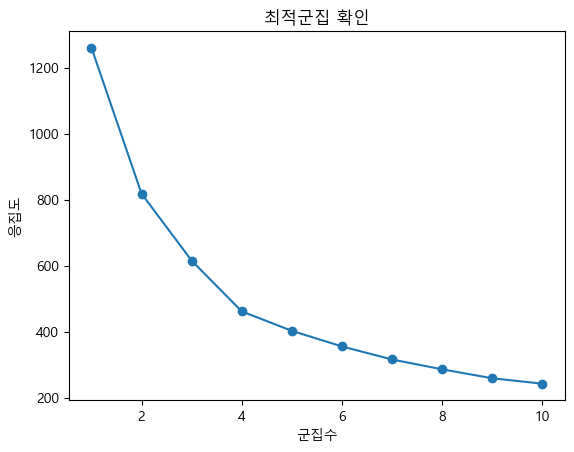

In [24]:
# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('군집수')
plt.ylabel('응집도')
plt.title('최적군집 확인')
plt.show()

In [25]:
# K-means 클러스터링
k = 4  # 선택한 K값
kmeans = KMeans(n_clusters=k, random_state=42)
df1['cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터별 통계 정보 출력
cluster_stats = df1.groupby('cluster').mean()
print(cluster_stats)

              월평균소득금액  1인가구 비율(%)  3개년 평균출생인구
cluster                                      
0        2.892712e+06   32.343764   85.438764
1        5.076616e+06   20.107778   90.482540
2        3.586058e+06   29.970306  180.784694
3        2.948903e+06   54.166543   58.585185


0번 클러스터(2순위) : 소득이 높고, 1인가구비율이 높고, 출생인구가 가장 높음   
1번 클러스터(1순위) : 소득이 적고, 1인가구비율이 적고, 출생인구 높음  
2번 클러스터(3순위) : 소득이 가장 높고, 1인가구비율이 적고, 출생인구 2순위  
3번 클러스터(4순위) : 소득이 적고, 1인가구비율이 가장 높고, 출생인구 가장 적음 

In [26]:
df1.loc[df1['cluster'] == 3, 'cluster'] = '4순위'
df1.loc[df1['cluster'] == 2, 'cluster'] = '3순위'
df1.loc[df1['cluster'] == 1, 'cluster'] = '1순위'
df1.loc[df1['cluster'] == 0, 'cluster'] = '2순위'

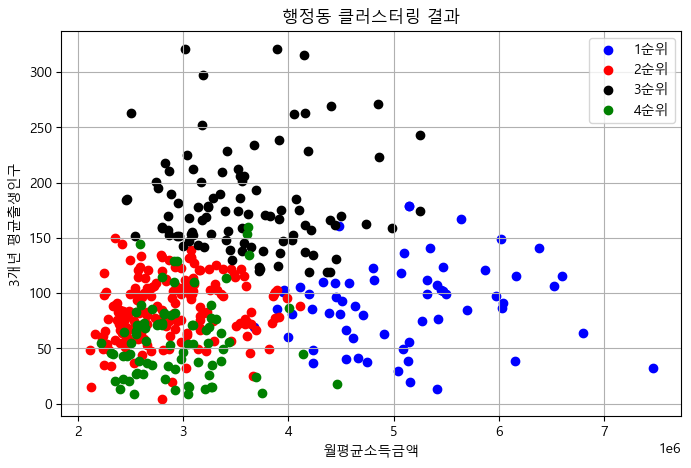

In [27]:
colors = ['blue', 'red', 'black', 'green']

plt.figure(figsize=(8, 5))

for cluster, color in zip(df1['cluster'].unique(), colors):
    plt.scatter(df1[df1['cluster'] == cluster]['월평균소득금액'], 
                df1[df1['cluster'] == cluster]['3개년 평균출생인구'],
                color=color,
                label=f'{cluster}')  

plt.xlabel('월평균소득금액')
plt.ylabel('3개년 평균출생인구')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

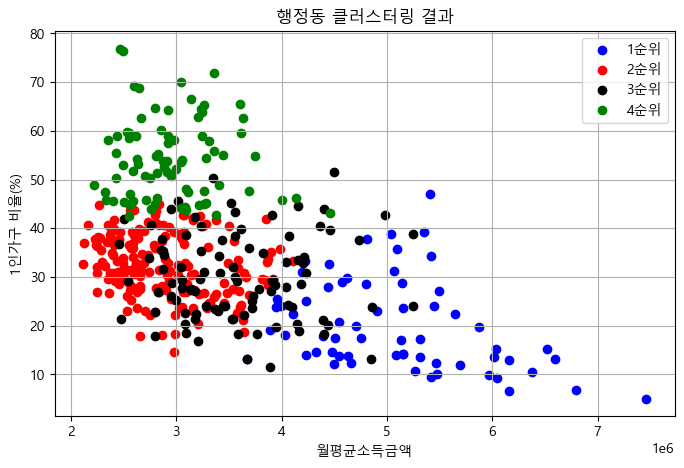

In [28]:
plt.figure(figsize=(8, 5))

for cluster, color in zip(df1['cluster'].unique(), colors):
    plt.scatter(df1[df1['cluster'] == cluster]['월평균소득금액'], 
                df1[df1['cluster'] == cluster]['1인가구 비율(%)'],
                color=color,
                label=f'{cluster}')  

plt.xlabel('월평균소득금액')
plt.ylabel('1인가구 비율(%)')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

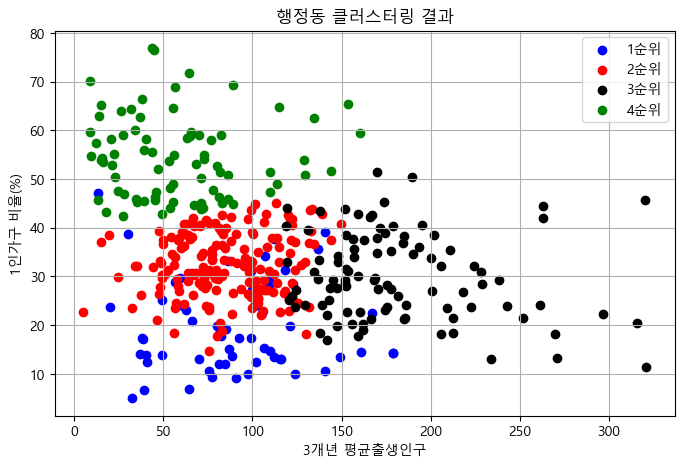

In [29]:
plt.figure(figsize=(8, 5))

for cluster, color in zip(df1['cluster'].unique(), colors):
    plt.scatter(df1[df1['cluster'] == cluster]['3개년 평균출생인구'], 
                df1[df1['cluster'] == cluster]['1인가구 비율(%)'],
                color=color,
                label=f'{cluster}')  

plt.xlabel('3개년 평균출생인구')
plt.ylabel('1인가구 비율(%)')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

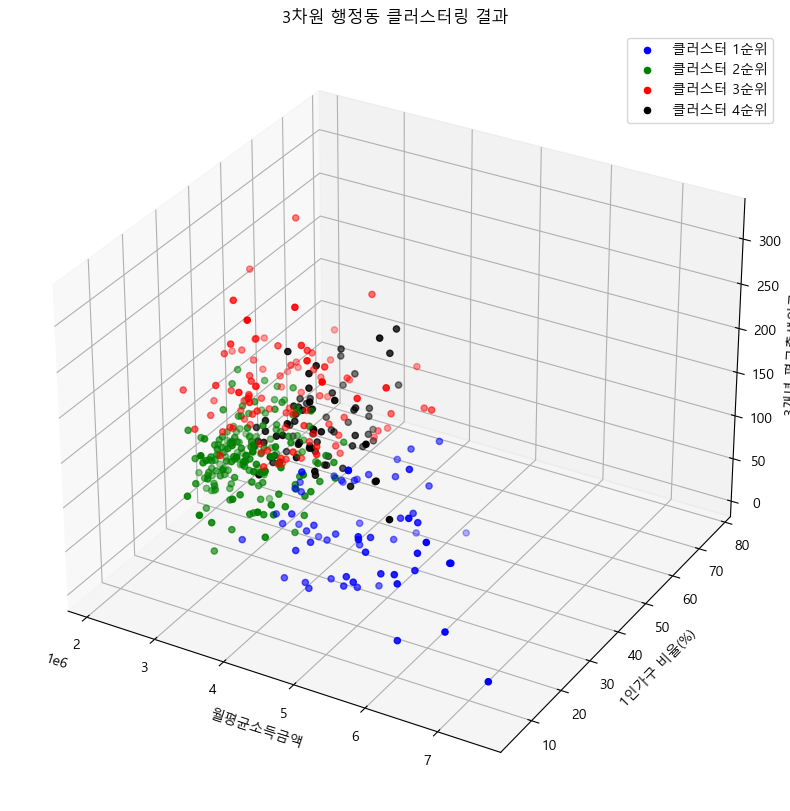

In [30]:
# 3차원 그래프 생성
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'green', 'red', 'black']
for cluster, color in zip(df1['cluster'].unique(), colors):
    ax.scatter(df1[df1['cluster'] == cluster]['월평균소득금액'], 
               df1[df1['cluster'] == cluster]['1인가구 비율(%)'], 
               df1[df1['cluster'] == cluster]['3개년 평균출생인구'],
               color=color,
               label=f'클러스터 {cluster}')

# 각 축에 라벨 추가
ax.set_xlabel('월평균소득금액')
ax.set_ylabel('1인가구 비율(%)')
ax.set_zlabel('3개년 평균출생인구')


plt.title('3차원 행정동 클러스터링 결과')
plt.legend()
plt.show()


In [31]:
df1

,월평균소득금액,1인가구 비율(%),3개년 평균출생인구,cluster
0,5039456,38.73,30.0,1순위
1,3661725,29.92,24.7,2순위
2,4544046,20.78,66.3,1순위
3,4397761,44.03,119.3,3순위
4,3487691,32.85,115.0,2순위
...,...,...,...,...
415,4617088,29.69,59.3,1순위
416,3261845,65.21,15.0,4순위
417,3869928,28.31,101.0,2순위
418,2335731,45.69,45.3,4순위


In [32]:
df1['자치구'] = df_origin['자치구'].to_list()
df1['행정동'] = df_origin['행정동'].to_list()
df1['공립유치원수'] = df_origin['공립'].to_list()

In [33]:
df1

,월평균소득금액,1인가구 비율(%),3개년 평균출생인구,cluster,자치구,행정동,공립유치원수
0,5039456,38.73,30.0,1순위,종로구,사직동,0
1,3661725,29.92,24.7,2순위,종로구,부암동,0
2,4544046,20.78,66.3,1순위,종로구,평창동,0
3,4397761,44.03,119.3,3순위,용산구,한남동,1
4,3487691,32.85,115.0,2순위,성동구,왕십리2동,1
...,...,...,...,...,...,...,...
415,4617088,29.69,59.3,1순위,종로구,교남동,0
416,3261845,65.21,15.0,4순위,종로구,종로1·2·3·4가동,0
417,3869928,28.31,101.0,2순위,서초구,방배2동,0
418,2335731,45.69,45.3,4순위,강북구,미아동,0


In [34]:
df1[df1['자치구'] == '광진구'].sort_values(by = 'cluster')

,월평균소득금액,1인가구 비율(%),3개년 평균출생인구,cluster,자치구,행정동,공립유치원수
177,5314464,13.46,112.0,1순위,광진구,광장동,1
38,2928061,29.16,106.7,2순위,광진구,구의2동,0
169,2576212,39.31,82.3,2순위,광진구,중곡2동,0
171,2409648,41.61,74.0,2순위,광진구,중곡3동,1
172,2542721,31.41,104.3,2순위,광진구,중곡4동,1
179,3018829,30.48,112.3,2순위,광진구,자양2동,2
37,4391943,21.22,166.3,3순위,광진구,자양3동,1
175,4041811,27.99,152.7,3순위,광진구,구의3동,0
164,2490675,76.43,44.7,4순위,광진구,화양동,1
165,2626714,54.19,73.0,4순위,광진구,군자동,0


## Kmeans 군집분석(광진구 - 피쳐 변경)

In [35]:
df_origin.head()
df3 = df_origin.copy()

In [36]:
df3['공립유치원, 보육시설수'] = df3['공립보육시설수'] + df3['공립']
df3.drop(columns=['공립보육시설정원','공립유치원정원', '공립보육시설수', '공립'], inplace = True)
df3.head()

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),"공립유치원, 보육시설수"
0,종로구,사직동,23,6,5039456,462,2476,30.0,38.73,1.0
1,종로구,부암동,2,0,3661725,381,2586,24.7,29.92,2.0
2,종로구,평창동,6,3,4544046,996,4740,66.3,20.78,1.0
3,용산구,한남동,21,1,4397761,1027,6364,119.3,44.03,3.0
4,성동구,왕십리2동,42,2,3487691,1053,5333,115.0,32.85,7.0


In [37]:
# 광진구만 추출
df3 = df3[df3['자치구'] == '광진구']
df3.drop(columns='자치구', inplace=True)

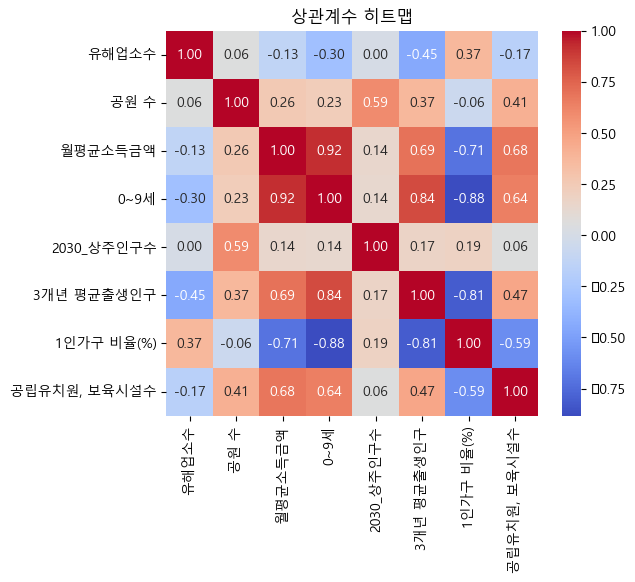

In [38]:
# 상관계수 확인
correlation_matrix = df3.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관계수 히트맵')
plt.show()

In [39]:
df_km3 = df3[['월평균소득금액', '3개년 평균출생인구', '2030_상주인구수']]

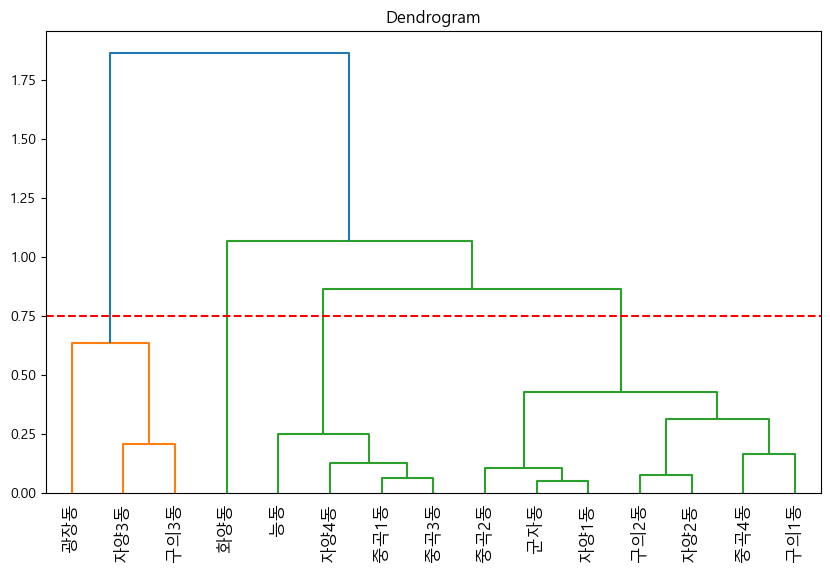

In [40]:
df_km3_1_dd = df_km3.copy()
df_km3_1_dd['행정동'] = df3['행정동']

df_km3_1_dd.set_index('행정동', inplace=True)

# Min-Max 정규화 수행
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_km3_1_dd)

df_normalized = pd.DataFrame(normalized_data, columns=df_km3_1_dd.columns, index=df_km3_1_dd.index)

# 계층적 군집 분석 수행
clusters = linkage(df_normalized, 
                   method = 'ward',
                   metric = 'euclidean')

# 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(Z = clusters, labels=df_km3_1_dd.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.axhline(y = 0.75, color = 'r', linestyle = '--')
plt.show()

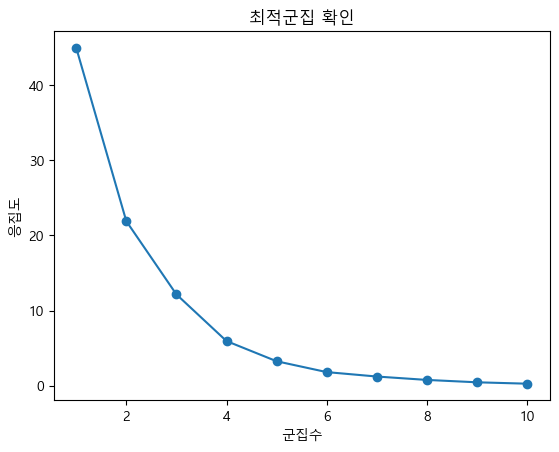

In [41]:
# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_km3)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('군집수')
plt.ylabel('응집도')
plt.title('최적군집 확인')
plt.show()

In [42]:
# K-means 클러스터링
k = 4  # 선택한 K값
kmeans = KMeans(n_clusters=k, random_state= 1)
df_km3['cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터별 통계 정보 출력
cluster_stats = df_km3.groupby('cluster').mean()
cluster_stats

,월평균소득금액,3개년 평균출생인구,2030_상주인구수
cluster,,,
0,2.736481e+06,90.985714,7963.00
1,4.582739e+06,143.666667,8581.00
2,2.490675e+06,44.700000,12826.00
3,2.659965e+06,67.325000,5312.25


In [43]:
df_km3['행정동'] = df3['행정동']
df_km3.reset_index(drop=True, inplace=True)

In [44]:
df_km3.loc[df_km3['cluster'] == 3, 'cluster'] = '3순위'
df_km3.loc[df_km3['cluster'] == 2, 'cluster'] = '4순위'
df_km3.loc[df_km3['cluster'] == 1, 'cluster'] = '2순위'
df_km3.loc[df_km3['cluster'] == 0, 'cluster'] = '1순위'

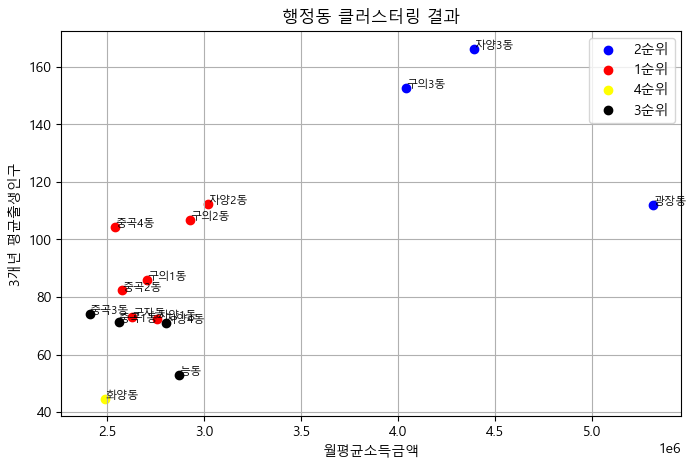

In [45]:
colors = ['blue', 'red', 'yellow', 'black']

plt.figure(figsize=(8, 5))

for cluster, color in zip(df_km3['cluster'].unique(), colors):
    plt.scatter(df_km3[df_km3['cluster'] == cluster]['월평균소득금액'], 
                df_km3[df_km3['cluster'] == cluster]['3개년 평균출생인구'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_km3)):
    plt.text(df_km3['월평균소득금액'][i], df_km3['3개년 평균출생인구'][i], df_km3['행정동'][i], fontsize=8)

plt.xlabel('월평균소득금액')
plt.ylabel('3개년 평균출생인구')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

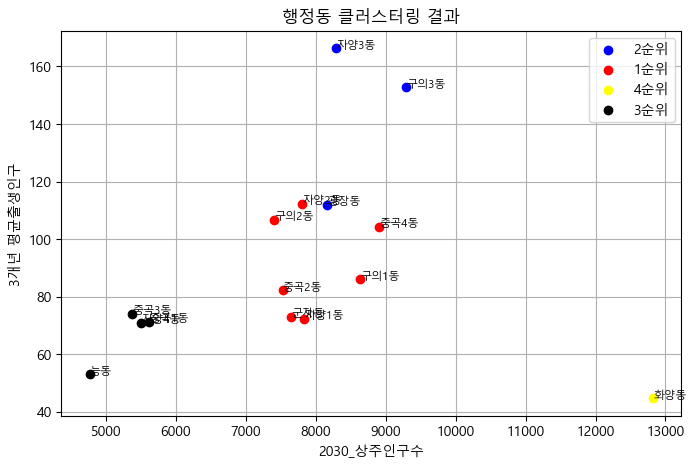

In [46]:
plt.figure(figsize=(8, 5))

for cluster, color in zip(df_km3['cluster'].unique(), colors):
    plt.scatter(df_km3[df_km3['cluster'] == cluster]['2030_상주인구수'], 
                df_km3[df_km3['cluster'] == cluster]['3개년 평균출생인구'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_km3)):
    plt.text(df_km3['2030_상주인구수'][i], df_km3['3개년 평균출생인구'][i], df_km3['행정동'][i], fontsize=8)

plt.xlabel('2030_상주인구수')
plt.ylabel('3개년 평균출생인구')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

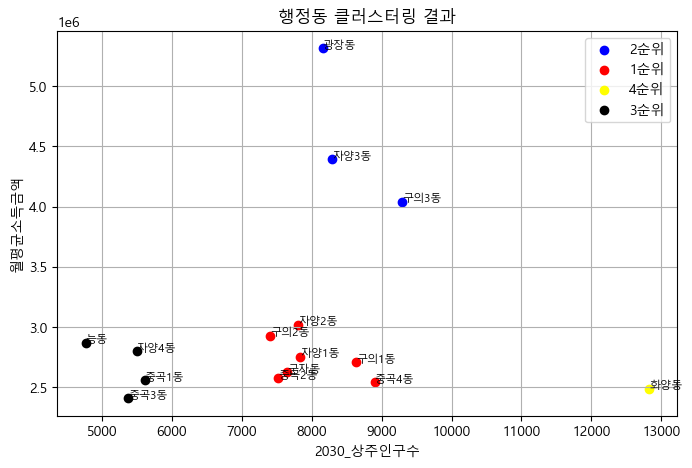

In [47]:
plt.figure(figsize=(8, 5))

for cluster, color in zip(df_km3['cluster'].unique(), colors):
    plt.scatter(df_km3[df_km3['cluster'] == cluster]['2030_상주인구수'], 
                df_km3[df_km3['cluster'] == cluster]['월평균소득금액'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_km3)):
    plt.text(df_km3['2030_상주인구수'][i], df_km3['월평균소득금액'][i], df_km3['행정동'][i], fontsize=8)

plt.xlabel('2030_상주인구수')
plt.ylabel('월평균소득금액')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

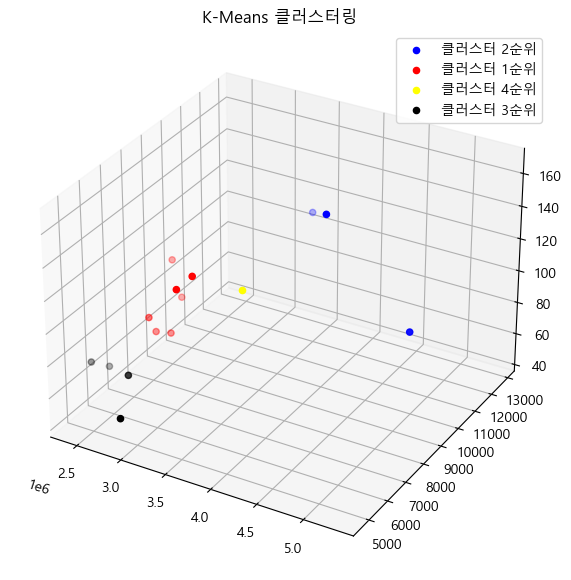

In [48]:
# 3차원 그래프 생성
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'yellow', 'black']

for cluster, color in zip(df_km3['cluster'].unique(), colors):
    ax.scatter(df_km3[df_km3['cluster'] == cluster]['월평균소득금액'], 
               df_km3[df_km3['cluster'] == cluster]['2030_상주인구수'], 
               df_km3[df_km3['cluster'] == cluster]['3개년 평균출생인구'],
               color=color,
               label=f'클러스터 {cluster}')

# # 각 점에 행정동 레이블 추가
# for index, row in df_km3.iterrows():
#     ax.text(row['월평균소득금액'], row['2030_상주인구수'], row['3개년 평균출생인구'], row['행정동'])

# ax.set_xlabel('월평균소득금액')
# ax.set_ylabel('1인가구 비율(%)')
# ax.set_zlabel('3개년 평균출생인구')


plt.title('K-Means 클러스터링')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_values = silhouette_samples(scaled_features, df_km3['cluster'])

# 개별 실루엣 계수 
for i, silhouette in enumerate(silhouette_values):
    print(f"{df_km3['행정동'][i]} 실루엣 계수: {round(silhouette,2)}")
print("")
# 전체 실루엣 계수
print(f"전체 실루엣 계수: {round(silhouette_score(scaled_features, df_km3['cluster']), 2)}")


자양3동 실루엣 계수: 0.55
구의2동 실루엣 계수: 0.48
화양동 실루엣 계수: 0.0
군자동 실루엣 계수: 0.38
중곡1동 실루엣 계수: 0.69
중곡2동 실루엣 계수: 0.45
중곡3동 실루엣 계수: 0.65
중곡4동 실루엣 계수: 0.57
능동 실루엣 계수: 0.62
구의1동 실루엣 계수: 0.6
구의3동 실루엣 계수: 0.45
광장동 실루엣 계수: 0.38
자양1동 실루엣 계수: 0.43
자양2동 실루엣 계수: 0.51
자양4동 실루엣 계수: 0.67

전체 실루엣 계수: 0.5


In [50]:
df_km3.sort_values(by = 'cluster')

,월평균소득금액,3개년 평균출생인구,2030_상주인구수,cluster,행정동
1,2928061,106.7,7401,1순위,구의2동
3,2626714,73.0,7647,1순위,군자동
5,2576212,82.3,7524,1순위,중곡2동
7,2542721,104.3,8900,1순위,중곡4동
9,2706661,86.0,8632,1순위,구의1동
12,2756172,72.3,7832,1순위,자양1동
13,3018829,112.3,7805,1순위,자양2동
0,4391943,166.3,8290,2순위,자양3동
10,4041811,152.7,9293,2순위,구의3동
11,5314464,112.0,8160,2순위,광장동


## 계층적 (Hierarchical) 군집분석(광진구)

In [51]:
df3_hc = df3.copy()

In [52]:
df3_hc = df3_hc[['행정동', '월평균소득금액', '3개년 평균출생인구', '2030_상주인구수']]
df3_hc

,행정동,월평균소득금액,3개년 평균출생인구,2030_상주인구수
37,자양3동,4391943,166.3,8290
38,구의2동,2928061,106.7,7401
164,화양동,2490675,44.7,12826
165,군자동,2626714,73.0,7647
167,중곡1동,2558983,71.3,5612
169,중곡2동,2576212,82.3,7524
171,중곡3동,2409648,74.0,5373
172,중곡4동,2542721,104.3,8900
173,능동,2870468,53.0,4766
174,구의1동,2706661,86.0,8632


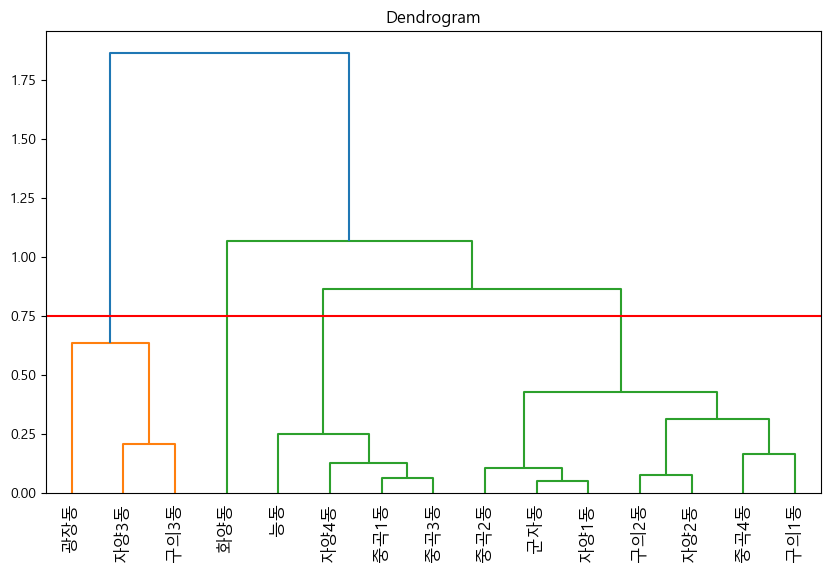

In [53]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler

df3_hc.set_index('행정동', inplace=True)

# Min-Max 정규화 수행
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df3_hc)

df_normalized = pd.DataFrame(normalized_data, columns=df3_hc.columns, index=df3_hc.index)

# 계층적 군집 분석 수행
clusters = linkage(df_normalized, 
                   method = 'ward',
                   metric = 'euclidean')

# 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(Z = clusters, labels=df3_hc.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.axhline(y = 0.75, color = 'r', linestyle = '-')
plt.show()

Text(0.5, 1.0, 'Labeled Data')

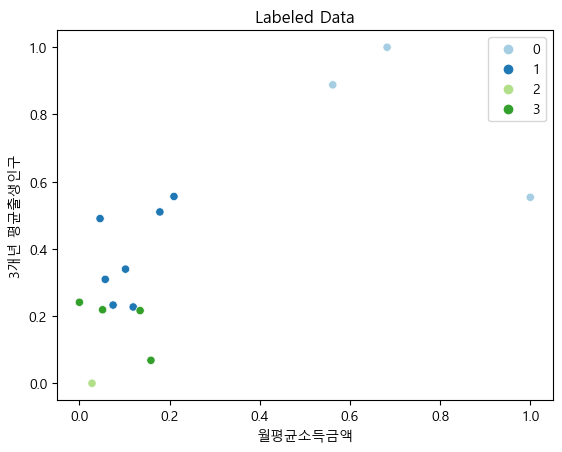

In [54]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering_model.fit(df_normalized)


    
data_labels = clustering_model.labels_
sns.scatterplot(x='월평균소득금액', 
                y='3개년 평균출생인구', 
                data=df_normalized, 
                hue=data_labels,
                palette="Paired").set_title('Labeled Data')

In [55]:
df_km3.sort_values(by = 'cluster')

,월평균소득금액,3개년 평균출생인구,2030_상주인구수,cluster,행정동
1,2928061,106.7,7401,1순위,구의2동
3,2626714,73.0,7647,1순위,군자동
5,2576212,82.3,7524,1순위,중곡2동
7,2542721,104.3,8900,1순위,중곡4동
9,2706661,86.0,8632,1순위,구의1동
12,2756172,72.3,7832,1순위,자양1동
13,3018829,112.3,7805,1순위,자양2동
0,4391943,166.3,8290,2순위,자양3동
10,4041811,152.7,9293,2순위,구의3동
11,5314464,112.0,8160,2순위,광장동


계층적 군집분석의 경우 k-means와 같이 분류한 것을 알 수 있다

## DBSCAN 밀도기반 클러스터링

### 광진구

In [56]:
df4_DBS = df3[['월평균소득금액', '3개년 평균출생인구', '2030_상주인구수']].reset_index(drop = True)
df4_DBS

,월평균소득금액,3개년 평균출생인구,2030_상주인구수
0,4391943,166.3,8290
1,2928061,106.7,7401
2,2490675,44.7,12826
3,2626714,73.0,7647
4,2558983,71.3,5612
5,2576212,82.3,7524
6,2409648,74.0,5373
7,2542721,104.3,8900
8,2870468,53.0,4766
9,2706661,86.0,8632


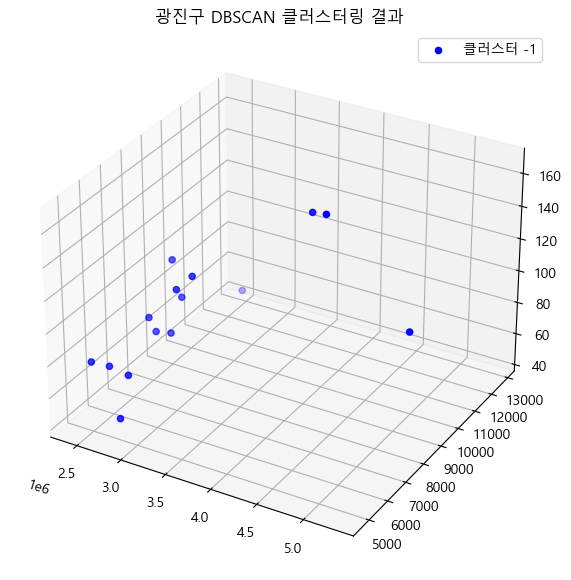

In [57]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df4_DBS)

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')  # 입실론(epsilon)과 최소 이웃 수(min_samples)는 조정 가능

# 모델 피팅
clusters = dbscan.fit_predict(scaled_features)

# 클러스터링 결과를 데이터프레임에 추가
df4_DBS['cluster'] = clusters

# 3차원 그래프 생성
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'black', 'yellow']
for cluster, color in zip(df4_DBS['cluster'].unique(), colors):
    ax.scatter(df4_DBS[df4_DBS['cluster'] == cluster]['월평균소득금액'], 
               df4_DBS[df4_DBS['cluster'] == cluster]['2030_상주인구수'], 
               df4_DBS[df4_DBS['cluster'] == cluster]['3개년 평균출생인구'],
               color=color,
               label=f'클러스터 {cluster}')

# # 각 점에 행정동 레이블 추가
# for index, row in df_km3.iterrows():
#     ax.text(row['월평균소득금액'], row['2030_상주인구수'], row['3개년 평균출생인구'], row['행정동'])

# ax.set_xlabel('월평균소득금액')
# ax.set_ylabel('1인가구 비율(%)')
# ax.set_zlabel('3개년 평균출생인구')


plt.title('광진구 DBSCAN 클러스터링 결과')
plt.legend()
plt.show()


DBSCAN은 밀도기반클러스터링..  
데이터의 수가 적어서 군집화가 수행되지 않는 모습  
서울 전체 데이터로 DBSCAN실시

### 서울전체

In [58]:
# 서울 전체 DBSCAN
ex = df_origin[['월평균소득금액', '3개년 평균출생인구', '2030_상주인구수']]

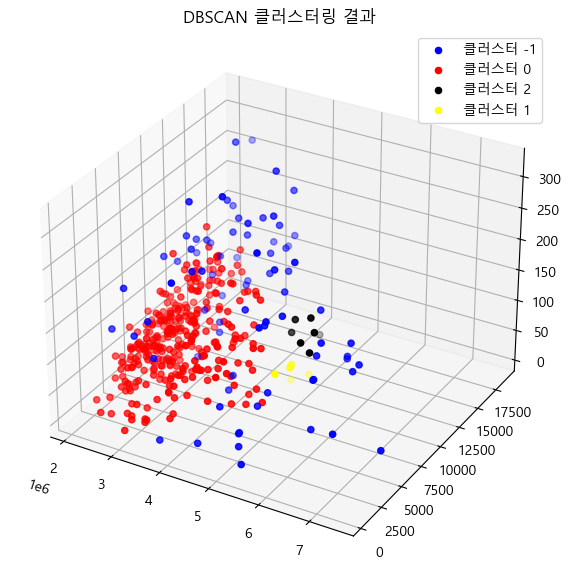

In [59]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ex)

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')  # 입실론(epsilon)과 최소 이웃 수(min_samples)는 조정 가능

# 모델 피팅
clusters = dbscan.fit_predict(scaled_features)

# 클러스터링 결과를 데이터프레임에 추가
ex['cluster'] = clusters

# 3차원 그래프 생성
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'black', 'yellow']
for cluster, color in zip(ex['cluster'].unique(), colors):
    ax.scatter(ex[ex['cluster'] == cluster]['월평균소득금액'], 
               ex[ex['cluster'] == cluster]['2030_상주인구수'], 
               ex[ex['cluster'] == cluster]['3개년 평균출생인구'],
               color=color,
               label=f'클러스터 {cluster}')

# # 각 점에 행정동 레이블 추가
# for index, row in df_km3.iterrows():
#     ax.text(row['월평균소득금액'], row['2030_상주인구수'], row['3개년 평균출생인구'], row['행정동'])

# ax.set_xlabel('월평균소득금액')
# ax.set_ylabel('1인가구 비율(%)')
# ax.set_zlabel('3개년 평균출생인구')


plt.title('DBSCAN 클러스터링 결과')
plt.legend()
plt.show()


In [60]:
ex['cluster'].value_counts(normalize = True)

 0    0.776190
-1    0.195238
 2    0.016667
 1    0.011905
Name: cluster, dtype: float64

## Kmeans 군집분석(광진구 - 피쳐 2개)

In [61]:
df3.head()

,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),"공립유치원, 보육시설수"
37,자양3동,5,2,4391943,1958,8290,166.3,21.22,4.0
38,구의2동,2,2,2928061,1308,7401,106.7,29.16,3.0
164,화양동,11,4,2490675,284,12826,44.7,76.43,3.0
165,군자동,11,2,2626714,645,7647,73.0,54.19,4.0
167,중곡1동,11,1,2558983,565,5612,71.3,44.68,2.0


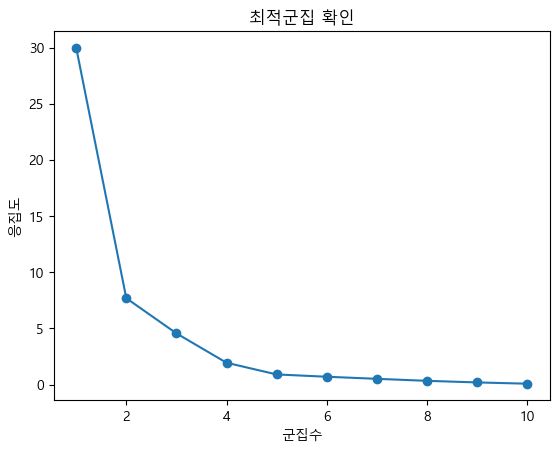

In [62]:
df_km_s = df3[['월평균소득금액', '3개년 평균출생인구']]

# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_km_s)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('군집수')
plt.ylabel('응집도')
plt.title('최적군집 확인')
plt.show()

In [63]:
# K-means 클러스터링
k = 3  # 선택한 K값
kmeans = KMeans(n_clusters=k, random_state= 1)
df_km_s['cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터별 통계 정보 출력
cluster_stats = df_km_s.groupby('cluster').mean()
cluster_stats

,월평균소득금액,3개년 평균출생인구
cluster,,
0,2.829870e+06,107.766667
1,4.582739e+06,143.666667
2,2.644033e+06,69.733333


In [64]:
df_km_s.reset_index(drop = True, inplace = True)

In [65]:
df_km_s['행정동'] = df3['행정동'].to_list()

In [66]:
df_km_s.loc[df_km_s['cluster'] == 2, 'cluster'] = '2순위'
df_km_s.loc[df_km_s['cluster'] == 1, 'cluster'] = '3순위'
df_km_s.loc[df_km_s['cluster'] == 0, 'cluster'] = '1순위'

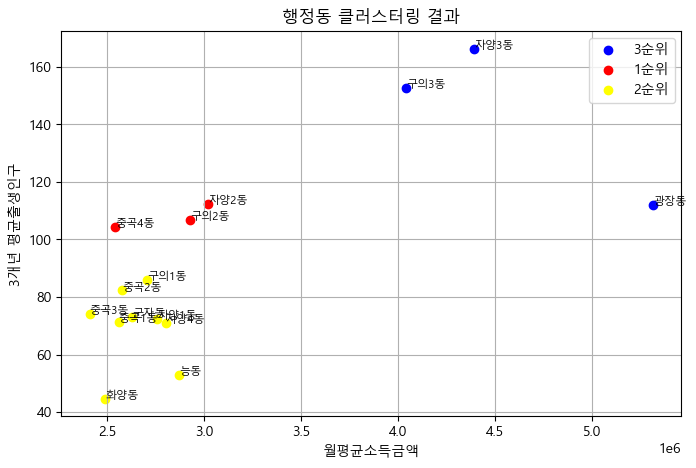

In [67]:
colors = ['blue', 'red', 'yellow', 'black']

plt.figure(figsize=(8, 5))

for cluster, color in zip(df_km_s['cluster'].unique(), colors):
    plt.scatter(df_km_s[df_km_s['cluster'] == cluster]['월평균소득금액'], 
                df_km_s[df_km_s['cluster'] == cluster]['3개년 평균출생인구'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_km_s)):
    plt.text(df_km_s['월평균소득금액'][i], df_km_s['3개년 평균출생인구'][i], df_km_s['행정동'][i], fontsize=8)

plt.xlabel('월평균소득금액')
plt.ylabel('3개년 평균출생인구')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
df_km_s.sort_values('cluster')

,월평균소득금액,3개년 평균출생인구,cluster,행정동
1,2928061,106.7,1순위,구의2동
7,2542721,104.3,1순위,중곡4동
13,3018829,112.3,1순위,자양2동
2,2490675,44.7,2순위,화양동
3,2626714,73.0,2순위,군자동
4,2558983,71.3,2순위,중곡1동
5,2576212,82.3,2순위,중곡2동
6,2409648,74.0,2순위,중곡3동
8,2870468,53.0,2순위,능동
9,2706661,86.0,2순위,구의1동


## 서울 전체 보육시설 확인

In [69]:
df_origin

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립
0,종로구,사직동,23,6,5039456,462,2476,30.0,38.73,101,1.0,0.0,0
1,종로구,부암동,2,0,3661725,381,2586,24.7,29.92,127,2.0,0.0,0
2,종로구,평창동,6,3,4544046,996,4740,66.3,20.78,123,1.0,0.0,0
3,용산구,한남동,21,1,4397761,1027,6364,119.3,44.03,145,2.0,34.0,1
4,성동구,왕십리2동,42,2,3487691,1053,5333,115.0,32.85,336,6.0,39.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,종로구,교남동,3,1,4617088,741,2650,59.3,29.69,245,4.0,0.0,0
416,종로구,종로1·2·3·4가동,289,4,3261845,170,1751,15.0,65.21,97,2.0,0.0,0
417,서초구,방배2동,1,6,3869928,934,6287,101.0,28.31,298,5.0,0.0,0
418,강북구,미아동,7,5,2335731,565,6640,45.3,45.69,198,3.0,0.0,0


In [70]:
df_0_4 = pd.read_csv('../data/raw_data/주민등록인구(연령별_동별)_20240425155009.csv')
df_0_4.head()

,동별(1),동별(2),항목,2023 4/4
0,동별(1),동별(2),항목,0~4세
1,종로구,소계,한국인,2342
2,종로구,사직동,한국인,174
3,종로구,삼청동,한국인,28
4,종로구,부암동,한국인,118


In [71]:
df_0_4 = df_0_4[['동별(2)', '2023 4/4']]
df_0_4.columns = ['행정동', '0~4세 인구']
df_0_4['행정동'] = df_0_4['행정동'].str.replace('.', '·')

In [72]:
df_origin_2 = pd.merge(df_origin, df_0_4, on = '행정동', how = 'left')
df_origin_2

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립,0~4세 인구
0,종로구,사직동,23,6,5039456,462,2476,30.0,38.73,101,1.0,0.0,0,174
1,종로구,부암동,2,0,3661725,381,2586,24.7,29.92,127,2.0,0.0,0,118
2,종로구,평창동,6,3,4544046,996,4740,66.3,20.78,123,1.0,0.0,0,397
3,용산구,한남동,21,1,4397761,1027,6364,119.3,44.03,145,2.0,34.0,1,487
4,성동구,왕십리2동,42,2,3487691,1053,5333,115.0,32.85,336,6.0,39.0,1,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,종로구,교남동,3,1,4617088,741,2650,59.3,29.69,245,4.0,0.0,0,328
416,종로구,종로1·2·3·4가동,289,4,3261845,170,1751,15.0,65.21,97,2.0,0.0,0,83
417,서초구,방배2동,1,6,3869928,934,6287,101.0,28.31,298,5.0,0.0,0,401
418,강북구,미아동,7,5,2335731,565,6640,45.3,45.69,198,3.0,0.0,0,213


In [73]:
df_origin_2.sort_values(by = '3개년 평균출생인구', ascending=False)

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립,0~4세 인구
119,송파구,위례동,0,4,3893769,6382,7293,321.3,11.47,1532,16.0,538.0,5,2712
162,금천구,독산1동,35,8,3019139,2915,13828,320.7,45.62,722,16.0,105.0,2,1464
294,강서구,염창동,8,4,4149403,3436,12119,315.7,20.38,381,8.0,62.0,1,1462
63,노원구,상계8동,0,5,3184253,1901,7437,297.0,22.36,263,8.0,80.0,2,1023
393,송파구,가락1동,36,0,4845454,3003,5781,271.3,13.16,675,9.0,60.0,1,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,중구,장충동,12,0,2923569,134,1876,12.0,57.42,48,2.0,23.0,1,52
135,중구,명동,130,2,3744534,59,597,9.3,54.76,0,85.0,0.0,0,25
51,중구,을지로동,92,1,3041933,138,459,9.0,70.11,0,0.0,0.0,0,93
47,종로구,종로5·6가동,113,3,2534670,156,1651,8.7,59.73,41,1.0,0.0,0,53


In [74]:
df_origin_2['0~4세 인구'] = df_origin_2['0~4세 인구'].astype('int')

In [75]:
df_origin_2['0~4세 대비 공립보육정원(%)'] = round((df_origin_2['공립보육시설정원'] / df_origin_2['0~4세 인구'])*100,1)

In [76]:
df_origin_2

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립,0~4세 인구,0~4세 대비 공립보육정원(%)
0,종로구,사직동,23,6,5039456,462,2476,30.0,38.73,101,1.0,0.0,0,174,58.0
1,종로구,부암동,2,0,3661725,381,2586,24.7,29.92,127,2.0,0.0,0,118,107.6
2,종로구,평창동,6,3,4544046,996,4740,66.3,20.78,123,1.0,0.0,0,397,31.0
3,용산구,한남동,21,1,4397761,1027,6364,119.3,44.03,145,2.0,34.0,1,487,29.8
4,성동구,왕십리2동,42,2,3487691,1053,5333,115.0,32.85,336,6.0,39.0,1,530,63.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,종로구,교남동,3,1,4617088,741,2650,59.3,29.69,245,4.0,0.0,0,328,74.7
416,종로구,종로1·2·3·4가동,289,4,3261845,170,1751,15.0,65.21,97,2.0,0.0,0,83,116.9
417,서초구,방배2동,1,6,3869928,934,6287,101.0,28.31,298,5.0,0.0,0,401,74.3
418,강북구,미아동,7,5,2335731,565,6640,45.3,45.69,198,3.0,0.0,0,213,93.0


In [77]:
df_origin_2[df_origin_2['자치구'] == '광진구']

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립,0~4세 인구,0~4세 대비 공립보육정원(%)
37,광진구,자양3동,5,2,4391943,1958,8290,166.3,21.22,239,3.0,46.0,1,842,28.4
38,광진구,구의2동,2,2,2928061,1308,7401,106.7,29.16,152,3.0,0.0,0,527,28.8
164,광진구,화양동,11,4,2490675,284,12826,44.7,76.43,120,2.0,61.0,1,128,93.8
165,광진구,군자동,11,2,2626714,645,7647,73.0,54.19,241,4.0,0.0,0,269,89.6
167,광진구,중곡1동,11,1,2558983,565,5612,71.3,44.68,147,2.0,0.0,0,294,50.0
169,광진구,중곡2동,9,1,2576212,830,7524,82.3,39.31,208,4.0,0.0,0,320,65.0
171,광진구,중곡3동,7,1,2409648,605,5373,74.0,41.61,234,3.0,52.0,1,292,80.1
172,광진구,중곡4동,0,2,2542721,1015,8900,104.3,31.41,171,3.0,30.0,1,462,37.0
173,광진구,능동,6,0,2870468,432,4766,53.0,53.79,175,4.0,0.0,0,218,80.3
174,광진구,구의1동,8,1,2706661,859,8632,86.0,50.82,175,2.0,0.0,0,387,45.2


## 광진구 클러스터링 (보육시설추가) 

### K-means클러스터링 1차

['월평균소득금액', '3개년 평균출생인구', '0~4세 대비 공립보육정원(%)']

In [78]:
# 실제 유의미하다고 판단하는 변수만 추출 
df_origin_2 = df_origin_2[['자치구', '행정동', '유해업소수', '공원 수', '월평균소득금액', '0~9세', '2030_상주인구수', 
                        '3개년 평균출생인구', '1인가구 비율(%)', '0~4세 인구', '공립보육시설정원', '공립보육시설수', '0~4세 대비 공립보육정원(%)']]

In [79]:
df_origin_2.columns

Index(['자치구', '행정동', '유해업소수', '공원 수', '월평균소득금액', '0~9세', '2030_상주인구수',
       '3개년 평균출생인구', '1인가구 비율(%)', '0~4세 인구', '공립보육시설정원', '공립보육시설수',
       '0~4세 대비 공립보육정원(%)'],
      dtype='object')

In [80]:
df_cor = df_origin_2[df_origin_2['자치구'] == '광진구'][['월평균소득금액', '2030_상주인구수','3개년 평균출생인구', '1인가구 비율(%)', '공립보육시설정원', '0~4세 인구', '0~4세 대비 공립보육정원(%)']]

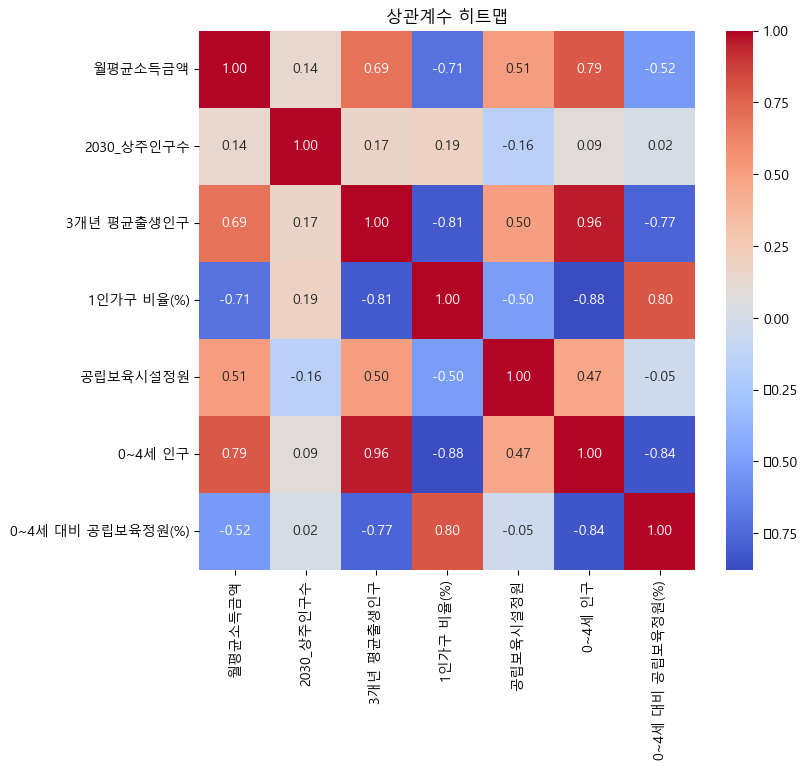

In [81]:
# 상관계수 확인
correlation_matrix = df_cor.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관계수 히트맵')
plt.show()

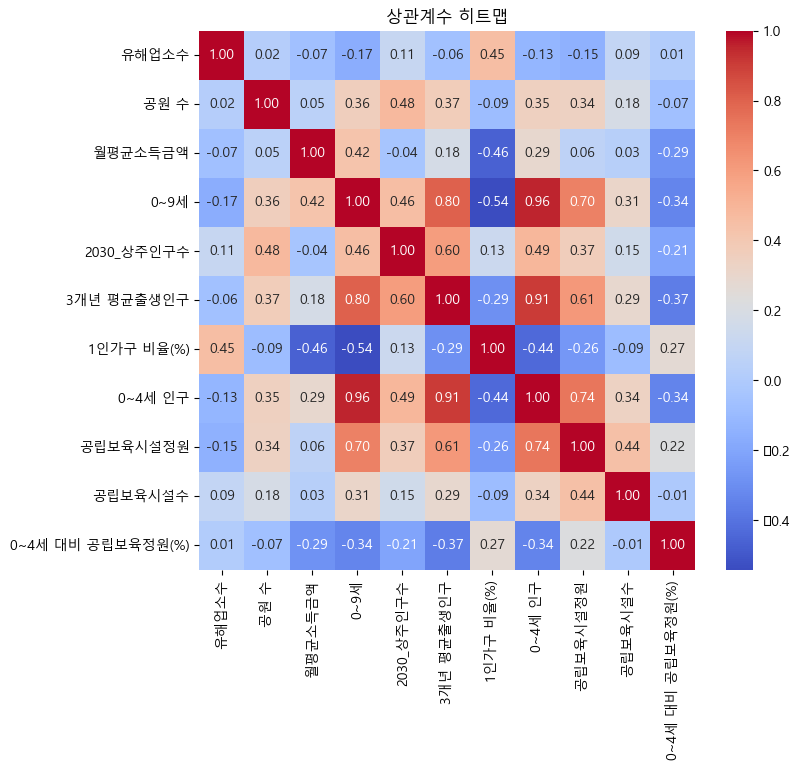

In [82]:
# 상관계수 확인
correlation_matrix = df_origin_2.corr()

plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관계수 히트맵')
plt.show()

In [83]:
# 광진구만 추출
df_new = df_origin_2[df_origin_2['자치구'] == '광진구']
df_new.reset_index(drop = True, inplace=True)
df_new_1 = df_new[['월평균소득금액', '3개년 평균출생인구', '0~4세 대비 공립보육정원(%)']]
df_new_1

,월평균소득금액,3개년 평균출생인구,0~4세 대비 공립보육정원(%)
0,4391943,166.3,28.4
1,2928061,106.7,28.8
2,2490675,44.7,93.8
3,2626714,73.0,89.6
4,2558983,71.3,50.0
5,2576212,82.3,65.0
6,2409648,74.0,80.1
7,2542721,104.3,37.0
8,2870468,53.0,80.3
9,2706661,86.0,45.2


1. 소득금액이 적고
2. 출생인구수가 많지만
3. 0~4세 인구대비 공립보육시설 정원이 부족한곳 

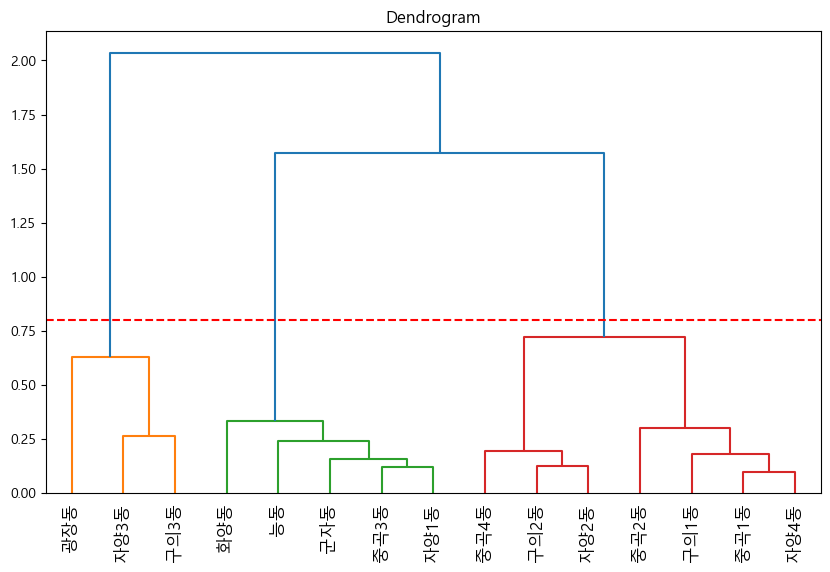

In [84]:
df_new_1_dd = df_new_1.copy()
df_new_1_dd['행정동'] = df_new['행정동']

df_new_1_dd.set_index('행정동', inplace=True)

# Min-Max 정규화 수행
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_new_1_dd)

df_normalized = pd.DataFrame(normalized_data, columns=df_new_1_dd.columns, index=df_new_1_dd.index)

# 계층적 군집 분석 수행
clusters = linkage(df_normalized, 
                   method = 'ward',
                   metric = 'euclidean')

# 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(Z = clusters, labels=df_new_1_dd.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.axhline(y = 0.8, color = 'r', linestyle = '--')
plt.show()

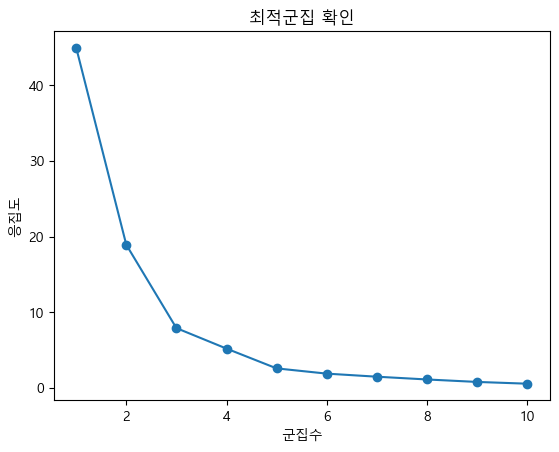

In [85]:
# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_new_1)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('군집수')
plt.ylabel('응집도')
plt.title('최적군집 확인')
plt.show()

In [86]:
# K-means 클러스터링
k = 3  # 선택한 K값
kmeans = KMeans(n_clusters=k, random_state=42)
df_new_1['cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터별 통계 정보 출력
cluster_stats = df_new_1.groupby('cluster').mean()
cluster_stats

,월평균소득금액,3개년 평균출생인구,0~4세 대비 공립보육정원(%)
cluster,,,
0,2.621648e+06,66.550000,81.666667
1,4.582739e+06,143.666667,35.800000
2,2.759336e+06,91.933333,41.716667


In [87]:
df_new_1.loc[df_new_1['cluster'] == 2, 'cluster'] = '1순위'
df_new_1.loc[df_new_1['cluster'] == 1, 'cluster'] = '2순위'
df_new_1.loc[df_new_1['cluster'] == 0, 'cluster'] = '3순위'

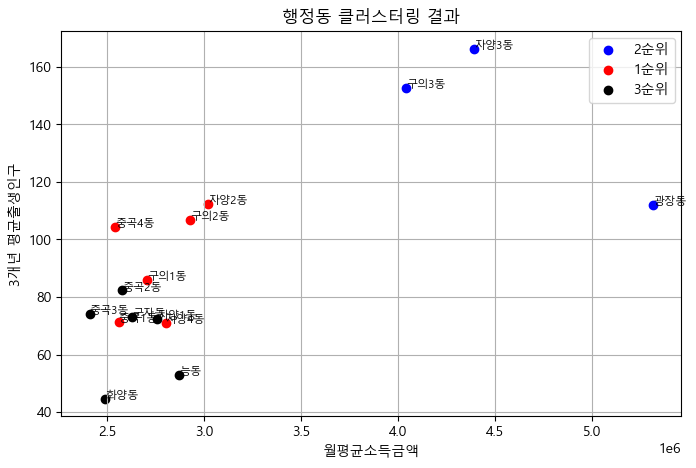

In [88]:
colors = ['blue', 'red', 'black']

plt.figure(figsize=(8, 5))

for cluster, color in zip(df_new_1['cluster'].unique(), colors):
    plt.scatter(df_new_1[df_new_1['cluster'] == cluster]['월평균소득금액'], 
                df_new_1[df_new_1['cluster'] == cluster]['3개년 평균출생인구'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_new_1)):
    plt.text(df_new_1['월평균소득금액'][i], df_new_1['3개년 평균출생인구'][i], df_new['행정동'][i], fontsize=8)

plt.xlabel('월평균소득금액')
plt.ylabel('3개년 평균출생인구')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

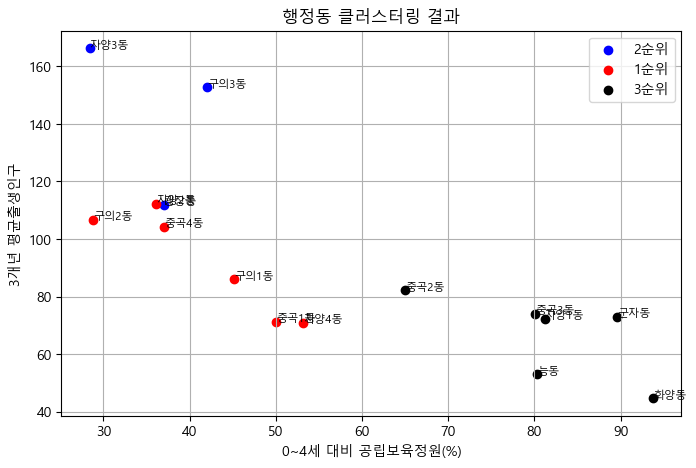

In [89]:
colors = ['blue', 'red', 'black']

plt.figure(figsize=(8, 5))

for cluster, color in zip(df_new_1['cluster'].unique(), colors):
    plt.scatter(df_new_1[df_new_1['cluster'] == cluster]['0~4세 대비 공립보육정원(%)'], 
                df_new_1[df_new_1['cluster'] == cluster]['3개년 평균출생인구'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_new_1)):
    plt.text(df_new_1['0~4세 대비 공립보육정원(%)'][i], df_new_1['3개년 평균출생인구'][i], df_new['행정동'][i], fontsize=8)

plt.xlabel('0~4세 대비 공립보육정원(%)')
plt.ylabel('3개년 평균출생인구')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

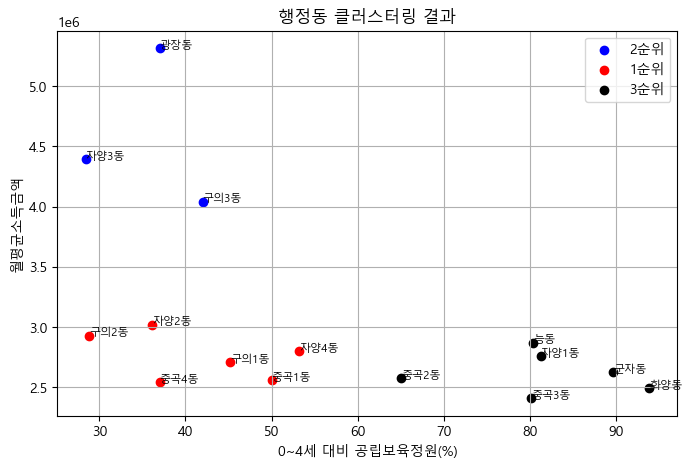

In [90]:
colors = ['blue', 'red', 'black']

plt.figure(figsize=(8, 5))

for cluster, color in zip(df_new_1['cluster'].unique(), colors):
    plt.scatter(df_new_1[df_new_1['cluster'] == cluster]['0~4세 대비 공립보육정원(%)'], 
                df_new_1[df_new_1['cluster'] == cluster]['월평균소득금액'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_new_1)):
    plt.text(df_new_1['0~4세 대비 공립보육정원(%)'][i], df_new_1['월평균소득금액'][i], df_new['행정동'][i], fontsize=8)

plt.xlabel('0~4세 대비 공립보육정원(%)')
plt.ylabel('월평균소득금액')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

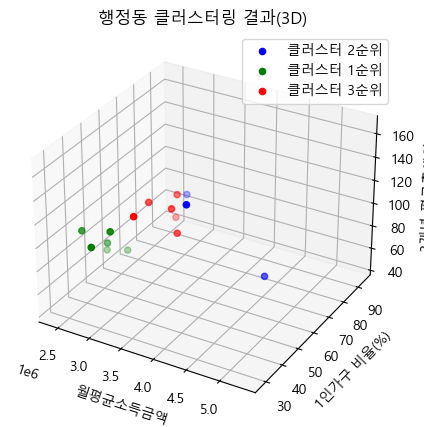

In [91]:
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 생성
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'green', 'red', 'black']
for cluster, color in zip(df_new_1['cluster'].unique(), colors):
    ax.scatter(df_new_1[df_new_1['cluster'] == cluster]['월평균소득금액'], 
               df_new_1[df_new_1['cluster'] == cluster]['0~4세 대비 공립보육정원(%)'], 
               df_new_1[df_new_1['cluster'] == cluster]['3개년 평균출생인구'],
               color=color,
               label=f'클러스터 {cluster}')

# 각 축에 라벨 추가
ax.set_xlabel('월평균소득금액')
ax.set_ylabel('1인가구 비율(%)')
ax.set_zlabel('3개년 평균출생인구')

# # 축범위 설정
# ax.set_xlim(0, 5000000)  
# ax.set_ylim(40, 100)  
# ax.set_zlim(40, 110)  

plt.title('행정동 클러스터링 결과(3D)')
plt.legend()
plt.show()

In [92]:
df_new_1['행정동'] = df_new['행정동'].to_list()

In [93]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_values = silhouette_samples(scaled_features, df_new_1['cluster'])

# 개별 실루엣 계수 
for i, silhouette in enumerate(silhouette_values):
    print(f"{df_new_1['행정동'][i]} 실루엣 계수: {round(silhouette,2)}")
print("")
# 전체 실루엣 계수
print(f"전체 실루엣 계수: {round(silhouette_score(scaled_features, df_new_1['cluster']), 2)}")

자양3동 실루엣 계수: 0.53
구의2동 실루엣 계수: 0.6
화양동 실루엣 계수: 0.6
군자동 실루엣 계수: 0.67
중곡1동 실루엣 계수: 0.33
중곡2동 실루엣 계수: 0.07
중곡3동 실루엣 계수: 0.62
중곡4동 실루엣 계수: 0.62
능동 실루엣 계수: 0.6
구의1동 실루엣 계수: 0.57
구의3동 실루엣 계수: 0.42
광장동 실루엣 계수: 0.38
자양1동 실루엣 계수: 0.65
자양2동 실루엣 계수: 0.57
자양4동 실루엣 계수: 0.24

전체 실루엣 계수: 0.5


In [100]:
silhouette_values = silhouette_samples(scaled_features, df_new_1['cluster'])


In [105]:
silhouette_values

array([0.53493473, 0.59952962, 0.59901296, 0.67117836, 0.32712004,
       0.07468909, 0.62026826, 0.62421307, 0.60157356, 0.57301992,
       0.42198374, 0.38112586, 0.65394058, 0.5710842 , 0.23739053])

In [95]:
df_new_1.sort_values(by = 'cluster')

,월평균소득금액,3개년 평균출생인구,0~4세 대비 공립보육정원(%),cluster,행정동
1,2928061,106.7,28.8,1순위,구의2동
4,2558983,71.3,50.0,1순위,중곡1동
7,2542721,104.3,37.0,1순위,중곡4동
9,2706661,86.0,45.2,1순위,구의1동
13,3018829,112.3,36.1,1순위,자양2동
14,2800761,71.0,53.2,1순위,자양4동
0,4391943,166.3,28.4,2순위,자양3동
10,4041811,152.7,42.0,2순위,구의3동
11,5314464,112.0,37.0,2순위,광장동
2,2490675,44.7,93.8,3순위,화양동


### K-means 클러스터링 2차 (제외)

In [96]:
df_new_2 = df_new[['0~4세 인구', '공립보육시설정원', '0~4세 대비 공립보육정원(%)']]
df_new_2.head()

,0~4세 인구,공립보육시설정원,0~4세 대비 공립보육정원(%)
0,842,239,28.4
1,527,152,28.8
2,128,120,93.8
3,269,241,89.6
4,294,147,50.0


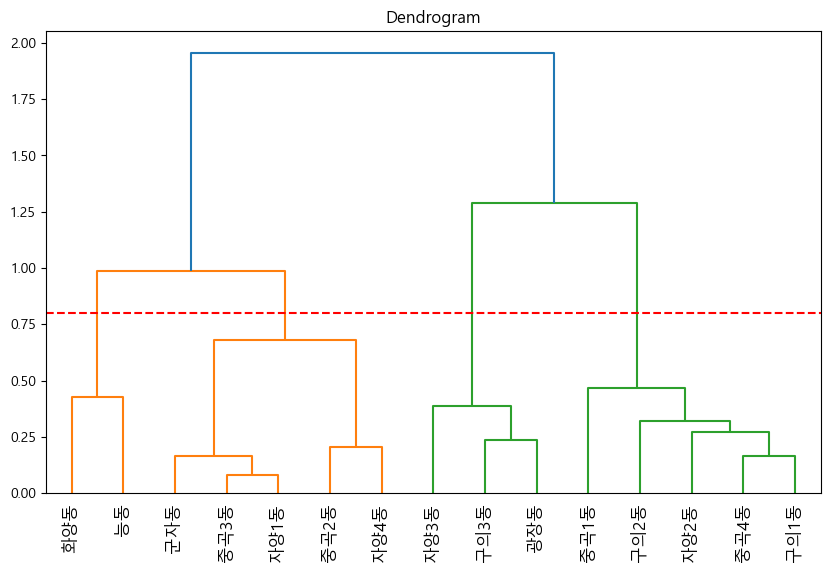

In [97]:
df_new_2_dd = df_new_2.copy()
df_new_2_dd['행정동'] = df_new['행정동']

df_new_2_dd.set_index('행정동', inplace=True)

# Min-Max 정규화 수행
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_new_2_dd)

df_normalized = pd.DataFrame(normalized_data, columns=df_new_2_dd.columns, index=df_new_2_dd.index)

# 계층적 군집 분석 수행
clusters = linkage(df_normalized, 
                   method = 'ward',
                   metric = 'euclidean')

# 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(Z = clusters, labels=df_new_2_dd.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.axhline(y = 0.8, color = 'r', linestyle = '--')
plt.show()

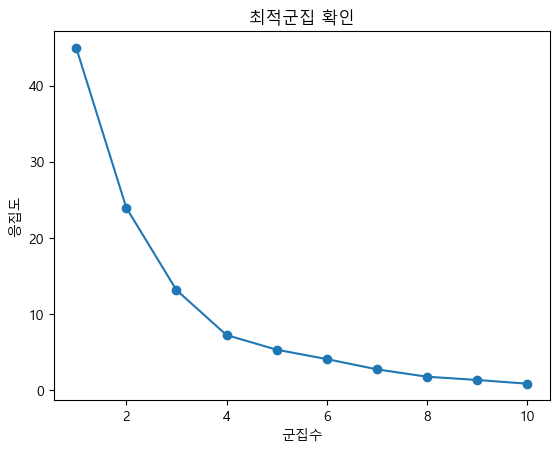

In [98]:
# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_new_2)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('군집수')
plt.ylabel('응집도')
plt.title('최적군집 확인')
plt.show()

In [99]:
# K-means 클러스터링
k = 4  # 선택한 K값
kmeans = KMeans(n_clusters=k, random_state = 1)
df_new_2['cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터별 통계 정보 출력
cluster_stats = df_new_2.groupby('cluster').mean()
cluster_stats

,0~4세 인구,공립보육시설정원,0~4세 대비 공립보육정원(%)
cluster,,,
0,434.000000,174.833333,41.716667
1,718.666667,252.666667,35.800000
2,173.000000,147.500000,87.050000
3,296.000000,232.250000,78.975000


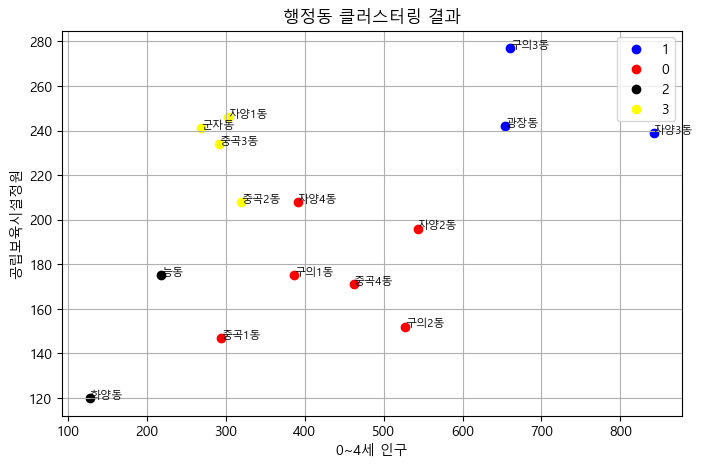

In [100]:
colors = ['blue', 'red', 'black', 'yellow']

plt.figure(figsize=(8, 5))

for cluster, color in zip(df_new_2['cluster'].unique(), colors):
    plt.scatter(df_new_2[df_new_2['cluster'] == cluster]['0~4세 인구'], 
                df_new_2[df_new_2['cluster'] == cluster]['공립보육시설정원'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_new_2)):
    plt.text(df_new_2['0~4세 인구'][i], df_new_2['공립보육시설정원'][i], df_new['행정동'][i], fontsize=8)

plt.xlabel('0~4세 인구')
plt.ylabel('공립보육시설정원')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

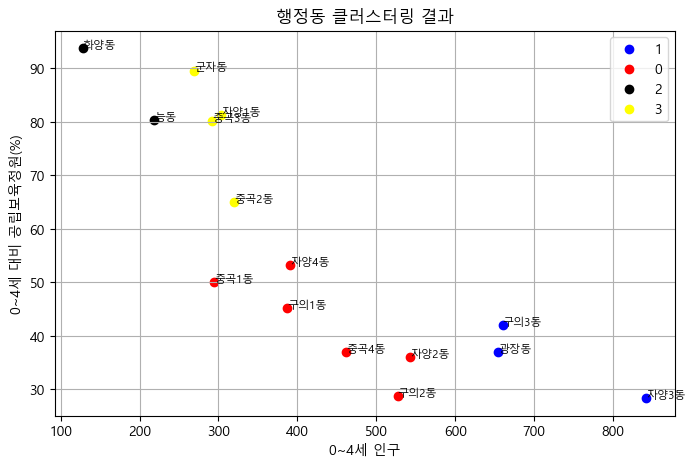

In [101]:
plt.figure(figsize=(8, 5))

for cluster, color in zip(df_new_2['cluster'].unique(), colors):
    plt.scatter(df_new_2[df_new_2['cluster'] == cluster]['0~4세 인구'], 
                df_new_2[df_new_2['cluster'] == cluster]['0~4세 대비 공립보육정원(%)'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_new_2)):
    plt.text(df_new_2['0~4세 인구'][i], df_new_2['0~4세 대비 공립보육정원(%)'][i], df_new['행정동'][i], fontsize=8)

plt.xlabel('0~4세 인구')
plt.ylabel('0~4세 대비 공립보육정원(%)')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

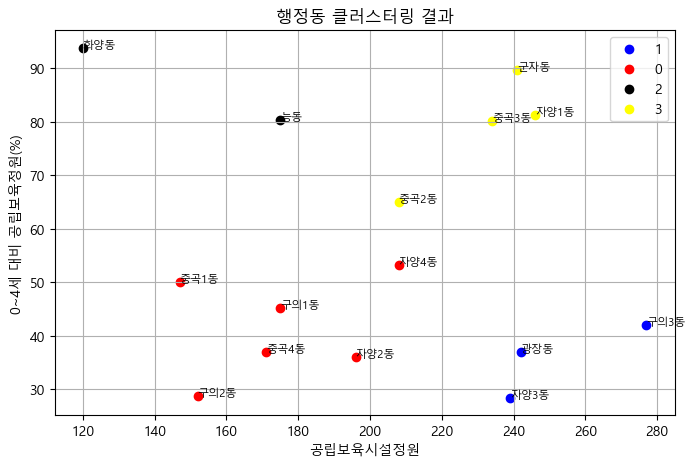

In [102]:
plt.figure(figsize=(8, 5))

for cluster, color in zip(df_new_2['cluster'].unique(), colors):
    plt.scatter(df_new_2[df_new_2['cluster'] == cluster]['공립보육시설정원'], 
                df_new_2[df_new_2['cluster'] == cluster]['0~4세 대비 공립보육정원(%)'],
                color=color,
                label=f'{cluster}')  

# 행정동 이름 레이블 추가
for i in range(len(df_new_2)):
    plt.text(df_new_2['공립보육시설정원'][i], df_new_2['0~4세 대비 공립보육정원(%)'][i], df_new['행정동'][i], fontsize=8)

plt.xlabel('공립보육시설정원')
plt.ylabel('0~4세 대비 공립보육정원(%)')
plt.title('행정동 클러스터링 결과')
plt.legend()
plt.grid(True)
plt.show()

In [103]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_values = silhouette_samples(scaled_features, df_new_2['cluster'])

# 개별 실루엣 계수 
for i, silhouette in enumerate(silhouette_values):
    print(f"{df_new['행정동'][i]} 실루엣 계수: {round(silhouette,2)}")
print("")
# 전체 실루엣 계수
print(f"전체 실루엣 계수: {round(silhouette_score(scaled_features, df_new_2['cluster']), 2)}")


자양3동 실루엣 계수: 0.54
구의2동 실루엣 계수: 0.52
화양동 실루엣 계수: 0.48
군자동 실루엣 계수: 0.66
중곡1동 실루엣 계수: 0.27
중곡2동 실루엣 계수: 0.26
중곡3동 실루엣 계수: 0.74
중곡4동 실루엣 계수: 0.64
능동 실루엣 계수: -0.01
구의1동 실루엣 계수: 0.57
구의3동 실루엣 계수: 0.58
광장동 실루엣 계수: 0.53
자양1동 실루엣 계수: 0.74
자양2동 실루엣 계수: 0.32
자양4동 실루엣 계수: 0.07

전체 실루엣 계수: 0.46


### K-means 클러스터링 3차

In [104]:
df_new.head()

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),0~4세 인구,공립보육시설정원,공립보육시설수,0~4세 대비 공립보육정원(%)
0,광진구,자양3동,5,2,4391943,1958,8290,166.3,21.22,842,239,3.0,28.4
1,광진구,구의2동,2,2,2928061,1308,7401,106.7,29.16,527,152,3.0,28.8
2,광진구,화양동,11,4,2490675,284,12826,44.7,76.43,128,120,2.0,93.8
3,광진구,군자동,11,2,2626714,645,7647,73.0,54.19,269,241,4.0,89.6
4,광진구,중곡1동,11,1,2558983,565,5612,71.3,44.68,294,147,2.0,50.0


In [105]:
df_new_3 = df_new[['2030_상주인구수', '3개년 평균출생인구', '1인가구 비율(%)']]
df_new_3.head()

,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%)
0,8290,166.3,21.22
1,7401,106.7,29.16
2,12826,44.7,76.43
3,7647,73.0,54.19
4,5612,71.3,44.68


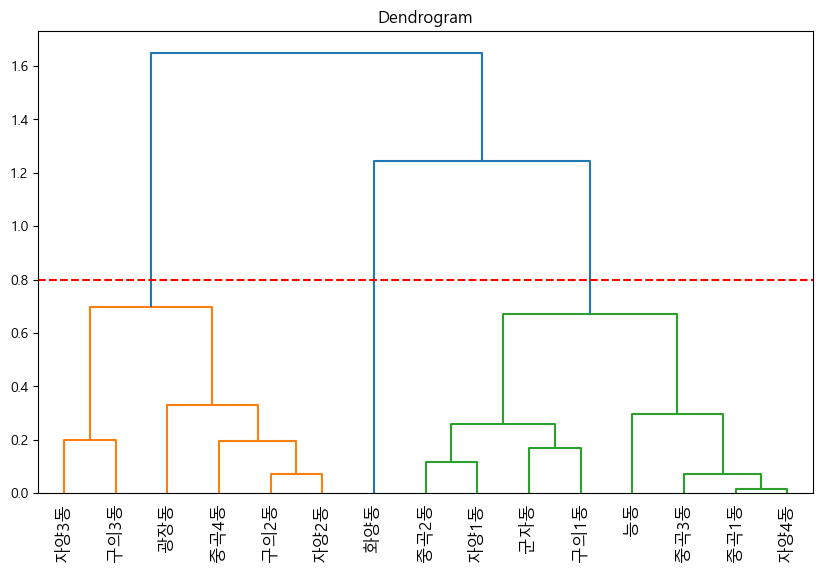

In [106]:
df_new_3_dd = df_new_3.copy()
df_new_3_dd['행정동'] = df_new['행정동']

df_new_3_dd.set_index('행정동', inplace=True)

# Min-Max 정규화 수행
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_new_3_dd)

df_normalized = pd.DataFrame(normalized_data, columns=df_new_3_dd.columns, index=df_new_3_dd.index)

# 계층적 군집 분석 수행
clusters = linkage(df_normalized, 
                   method = 'ward',
                   metric = 'euclidean')

# 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(Z = clusters, labels=df_new_3_dd.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.axhline(y = 0.8, color = 'r', linestyle = '--')
plt.show()

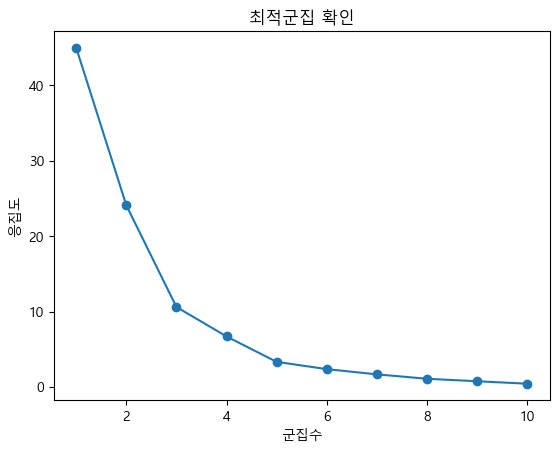

In [107]:
# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_new_3)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('군집수')
plt.ylabel('응집도')
plt.title('최적군집 확인')
plt.show()

In [108]:
# K-means 클러스터링
k = 3  # 선택한 K값
kmeans = KMeans(n_clusters=k, random_state=42)
df_new_3['cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터별 통계 정보 출력
cluster_stats = df_new_3.groupby('cluster').mean()
cluster_stats

,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%)
cluster,,,
0,6610.500000,72.862500,46.68
1,8308.166667,125.716667,25.62
2,12826.000000,44.700000,76.43


In [109]:
df_new_3.loc[df_new_3['cluster'] == 2, 'cluster'] = '3순위'
df_new_3.loc[df_new_3['cluster'] == 1, 'cluster'] = '1순위'
df_new_3.loc[df_new_3['cluster'] == 0, 'cluster'] = '2순위'

In [110]:
df_new_3['행정동'] = df_new['행정동']

In [111]:
df_new_3.sort_values(by = 'cluster')

,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),cluster,행정동
0,8290,166.3,21.22,1순위,자양3동
1,7401,106.7,29.16,1순위,구의2동
7,8900,104.3,31.41,1순위,중곡4동
10,9293,152.7,27.99,1순위,구의3동
11,8160,112.0,13.46,1순위,광장동
13,7805,112.3,30.48,1순위,자양2동
3,7647,73.0,54.19,2순위,군자동
4,5612,71.3,44.68,2순위,중곡1동
5,7524,82.3,39.31,2순위,중곡2동
6,5373,74.0,41.61,2순위,중곡3동


In [112]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_values = silhouette_samples(scaled_features, df_new_3['cluster'])

# 개별 실루엣 계수 
for i, silhouette in enumerate(silhouette_values):
    print(f"{df_new_3['행정동'][i]} 실루엣 계수: {round(silhouette,2)}")
print("")
# 전체 실루엣 계수
print(f"전체 실루엣 계수: {round(silhouette_score(scaled_features, df_new_3['cluster']), 2)}")


자양3동 실루엣 계수: 0.53
구의2동 실루엣 계수: 0.33
화양동 실루엣 계수: 0.0
군자동 실루엣 계수: 0.56
중곡1동 실루엣 계수: 0.64
중곡2동 실루엣 계수: 0.36
중곡3동 실루엣 계수: 0.58
중곡4동 실루엣 계수: 0.35
능동 실루엣 계수: 0.57
구의1동 실루엣 계수: 0.35
구의3동 실루엣 계수: 0.54
광장동 실루엣 계수: 0.49
자양1동 실루엣 계수: 0.5
자양2동 실루엣 계수: 0.43
자양4동 실루엣 계수: 0.64

전체 실루엣 계수: 0.46


### K-means 클러스터링 4차 (피쳐 4개)

In [113]:
df_new.head()

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),0~4세 인구,공립보육시설정원,공립보육시설수,0~4세 대비 공립보육정원(%)
0,광진구,자양3동,5,2,4391943,1958,8290,166.3,21.22,842,239,3.0,28.4
1,광진구,구의2동,2,2,2928061,1308,7401,106.7,29.16,527,152,3.0,28.8
2,광진구,화양동,11,4,2490675,284,12826,44.7,76.43,128,120,2.0,93.8
3,광진구,군자동,11,2,2626714,645,7647,73.0,54.19,269,241,4.0,89.6
4,광진구,중곡1동,11,1,2558983,565,5612,71.3,44.68,294,147,2.0,50.0


In [114]:
df_new_4 = df_new[['월평균소득금액', '3개년 평균출생인구', '1인가구 비율(%)', '0~4세 대비 공립보육정원(%)']]
df_new_4.head()

,월평균소득금액,3개년 평균출생인구,1인가구 비율(%),0~4세 대비 공립보육정원(%)
0,4391943,166.3,21.22,28.4
1,2928061,106.7,29.16,28.8
2,2490675,44.7,76.43,93.8
3,2626714,73.0,54.19,89.6
4,2558983,71.3,44.68,50.0


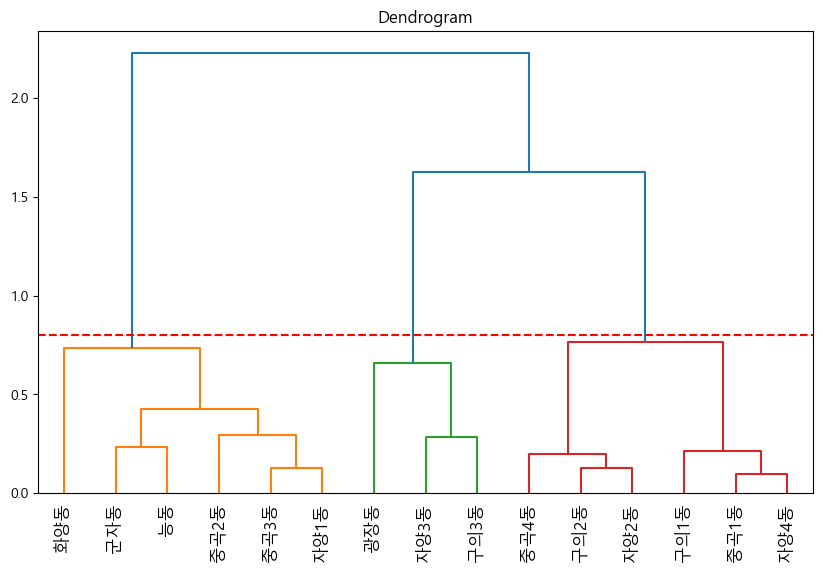

In [115]:
df_new_4_dd = df_new_4.copy()
df_new_4_dd['행정동'] = df_new['행정동']

df_new_4_dd.set_index('행정동', inplace=True)

# Min-Max 정규화 수행
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_new_4_dd)

df_normalized = pd.DataFrame(normalized_data, columns=df_new_4_dd.columns, index=df_new_4_dd.index)

# 계층적 군집 분석 수행
clusters = linkage(df_normalized, 
                   method = 'ward',
                   metric = 'euclidean')

# 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(Z = clusters, labels=df_new_4_dd.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.axhline(y = 0.8, color = 'r', linestyle = '--')
plt.show()

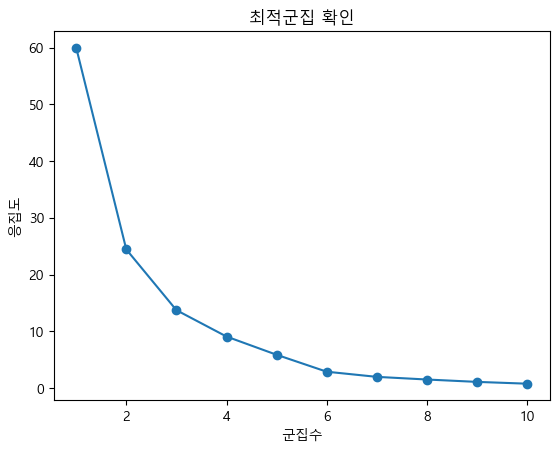

In [116]:
# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_new_4)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('군집수')
plt.ylabel('응집도')
plt.title('최적군집 확인')
plt.show()

In [117]:
# K-means 클러스터링
k = 3  # 선택한 K값
kmeans = KMeans(n_clusters=k, random_state=42)
df_new_4['cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터별 통계 정보 출력
cluster_stats = df_new_4.groupby('cluster').mean()
cluster_stats

,월평균소득금액,3개년 평균출생인구,1인가구 비율(%),0~4세 대비 공립보육정원(%)
cluster,,,,
0,4.582739e+06,143.666667,20.890000,35.800000
1,2.630735e+06,63.400000,54.000000,85.000000
2,2.733175e+06,90.557143,38.702857,45.042857


In [118]:
df_new_4.loc[df_new_4['cluster'] == 1, 'cluster'] = '3순위'
df_new_4.loc[df_new_4['cluster'] == 2, 'cluster'] = '1순위'
df_new_4.loc[df_new_4['cluster'] == 0, 'cluster'] = '2순위'

In [119]:
df_new_4['행정동'] = df_new['행정동']

In [120]:
df_new_4.sort_values(by = 'cluster')

,월평균소득금액,3개년 평균출생인구,1인가구 비율(%),0~4세 대비 공립보육정원(%),cluster,행정동
1,2928061,106.7,29.16,28.8,1순위,구의2동
4,2558983,71.3,44.68,50.0,1순위,중곡1동
5,2576212,82.3,39.31,65.0,1순위,중곡2동
7,2542721,104.3,31.41,37.0,1순위,중곡4동
9,2706661,86.0,50.82,45.2,1순위,구의1동
13,3018829,112.3,30.48,36.1,1순위,자양2동
14,2800761,71.0,45.06,53.2,1순위,자양4동
0,4391943,166.3,21.22,28.4,2순위,자양3동
10,4041811,152.7,27.99,42.0,2순위,구의3동
11,5314464,112.0,13.46,37.0,2순위,광장동


In [121]:
silhouette_values = silhouette_samples(scaled_features, df_new_4['cluster'])

# 개별 실루엣 계수 
for i, silhouette in enumerate(silhouette_values):
    print(f"{df_new_4['행정동'][i]} 실루엣 계수: {round(silhouette,2)}")
print("")
# 전체 실루엣 계수
print(f"전체 실루엣 계수: {round(silhouette_score(scaled_features, df_new_4['cluster']), 2)}")


자양3동 실루엣 계수: 0.55
구의2동 실루엣 계수: 0.46
화양동 실루엣 계수: 0.43
군자동 실루엣 계수: 0.55
중곡1동 실루엣 계수: 0.38
중곡2동 실루엣 계수: 0.13
중곡3동 실루엣 계수: 0.29
중곡4동 실루엣 계수: 0.59
능동 실루엣 계수: 0.49
구의1동 실루엣 계수: 0.41
구의3동 실루엣 계수: 0.4
광장동 실루엣 계수: 0.42
자양1동 실루엣 계수: 0.39
자양2동 실루엣 계수: 0.45
자양4동 실루엣 계수: 0.32

전체 실루엣 계수: 0.42


### K-means 클러스터링 5차 (피쳐 4개)

In [122]:
df_new.head()

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),0~4세 인구,공립보육시설정원,공립보육시설수,0~4세 대비 공립보육정원(%)
0,광진구,자양3동,5,2,4391943,1958,8290,166.3,21.22,842,239,3.0,28.4
1,광진구,구의2동,2,2,2928061,1308,7401,106.7,29.16,527,152,3.0,28.8
2,광진구,화양동,11,4,2490675,284,12826,44.7,76.43,128,120,2.0,93.8
3,광진구,군자동,11,2,2626714,645,7647,73.0,54.19,269,241,4.0,89.6
4,광진구,중곡1동,11,1,2558983,565,5612,71.3,44.68,294,147,2.0,50.0


In [123]:
df_new_5 = df_new[['월평균소득금액', '3개년 평균출생인구', '2030_상주인구수', '0~4세 인구']]
df_new_5.head()

,월평균소득금액,3개년 평균출생인구,2030_상주인구수,0~4세 인구
0,4391943,166.3,8290,842
1,2928061,106.7,7401,527
2,2490675,44.7,12826,128
3,2626714,73.0,7647,269
4,2558983,71.3,5612,294


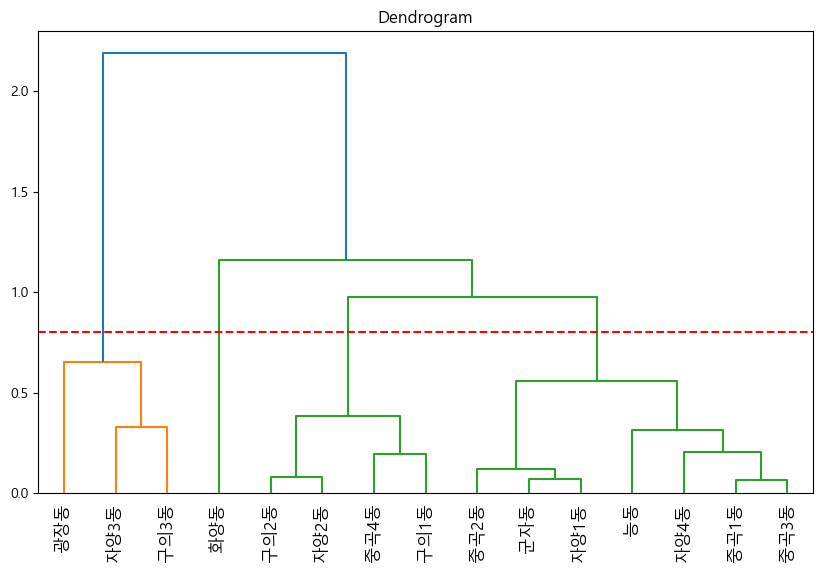

In [124]:
df_new_5_dd = df_new_5.copy()
df_new_5_dd['행정동'] = df_new['행정동']

df_new_5_dd.set_index('행정동', inplace=True)

# Min-Max 정규화 수행
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_new_5_dd)

df_normalized = pd.DataFrame(normalized_data, columns=df_new_5_dd.columns, index=df_new_5_dd.index)

# 계층적 군집 분석 수행
clusters = linkage(df_normalized, 
                   method = 'ward',
                   metric = 'euclidean')

# 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(Z = clusters, labels=df_new_5_dd.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.axhline(y = 0.8, color = 'r', linestyle = '--')
plt.show()

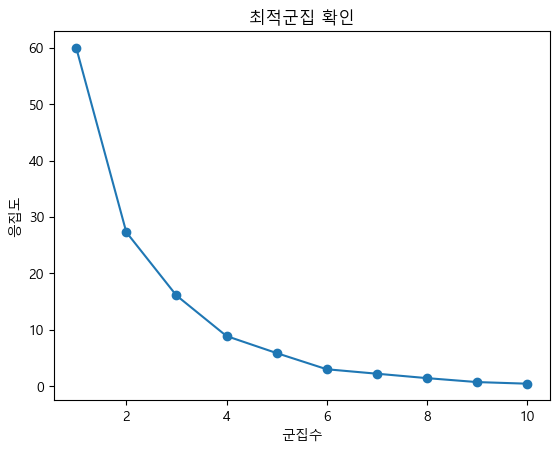

In [125]:
# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_new_5)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('군집수')
plt.ylabel('응집도')
plt.title('최적군집 확인')
plt.show()

In [126]:
# K-means 클러스터링
k = 4  # 선택한 K값
kmeans = KMeans(n_clusters=k, random_state=42)
df_new_5['cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터별 통계 정보 출력
cluster_stats = df_new_5.groupby('cluster').mean()
cluster_stats

,월평균소득금액,3개년 평균출생인구,2030_상주인구수,0~4세 인구
cluster,,,,
0,2.656994e+06,70.985714,6321.714286,298.142857
1,4.582739e+06,143.666667,8581.000000,718.666667
2,2.799068e+06,102.325000,8184.500000,479.750000
3,2.490675e+06,44.700000,12826.000000,128.000000


In [127]:
df_new_5.loc[df_new_5['cluster'] == 0, 'cluster'] = '3순위'
df_new_5.loc[df_new_5['cluster'] == 1, 'cluster'] = '2순위'
df_new_5.loc[df_new_5['cluster'] == 2, 'cluster'] = '1순위'
df_new_5.loc[df_new_5['cluster'] == 3, 'cluster'] = '4순위'

In [128]:
df_new_5['행정동'] = df_new['행정동']

In [129]:
df_new_5.sort_values(by = 'cluster')

,월평균소득금액,3개년 평균출생인구,2030_상주인구수,0~4세 인구,cluster,행정동
1,2928061,106.7,7401,527,1순위,구의2동
7,2542721,104.3,8900,462,1순위,중곡4동
9,2706661,86.0,8632,387,1순위,구의1동
13,3018829,112.3,7805,543,1순위,자양2동
0,4391943,166.3,8290,842,2순위,자양3동
10,4041811,152.7,9293,660,2순위,구의3동
11,5314464,112.0,8160,654,2순위,광장동
3,2626714,73.0,7647,269,3순위,군자동
4,2558983,71.3,5612,294,3순위,중곡1동
5,2576212,82.3,7524,320,3순위,중곡2동


In [130]:
silhouette_values = silhouette_samples(scaled_features, df_new_5['cluster'])

# 개별 실루엣 계수 
for i, silhouette in enumerate(silhouette_values):
    print(f"{df_new_5['행정동'][i]} 실루엣 계수: {round(silhouette,2)}")
print("")
# 전체 실루엣 계수
print(f"전체 실루엣 계수: {round(silhouette_score(scaled_features, df_new_5['cluster']), 2)}")


자양3동 실루엣 계수: 0.48
구의2동 실루엣 계수: 0.56
화양동 실루엣 계수: 0.0
군자동 실루엣 계수: 0.36
중곡1동 실루엣 계수: 0.58
중곡2동 실루엣 계수: 0.18
중곡3동 실루엣 계수: 0.55
중곡4동 실루엣 계수: 0.55
능동 실루엣 계수: 0.5
구의1동 실루엣 계수: 0.25
구의3동 실루엣 계수: 0.33
광장동 실루엣 계수: 0.34
자양1동 실루엣 계수: 0.25
자양2동 실루엣 계수: 0.6
자양4동 실루엣 계수: 0.43

전체 실루엣 계수: 0.4


In [131]:
df_origin

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립
0,종로구,사직동,23,6,5039456,462,2476,30.0,38.73,101,1.0,0.0,0
1,종로구,부암동,2,0,3661725,381,2586,24.7,29.92,127,2.0,0.0,0
2,종로구,평창동,6,3,4544046,996,4740,66.3,20.78,123,1.0,0.0,0
3,용산구,한남동,21,1,4397761,1027,6364,119.3,44.03,145,2.0,34.0,1
4,성동구,왕십리2동,42,2,3487691,1053,5333,115.0,32.85,336,6.0,39.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,종로구,교남동,3,1,4617088,741,2650,59.3,29.69,245,4.0,0.0,0
416,종로구,종로1·2·3·4가동,289,4,3261845,170,1751,15.0,65.21,97,2.0,0.0,0
417,서초구,방배2동,1,6,3869928,934,6287,101.0,28.31,298,5.0,0.0,0
418,강북구,미아동,7,5,2335731,565,6640,45.3,45.69,198,3.0,0.0,0


In [132]:
df_etc = df_origin[['자치구', '행정동', '월평균소득금액', '2030_상주인구수', '3개년 평균출생인구', '1인가구 비율(%)', '공립보육시설정원', '공립보육시설수']]
df_etc = df_etc[df_etc['자치구'] == '광진구']

In [133]:
df_etc.reset_index(drop=True).drop(columns = '자치구')

,행정동,월평균소득금액,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수
0,자양3동,4391943,8290,166.3,21.22,239,3.0
1,구의2동,2928061,7401,106.7,29.16,152,3.0
2,화양동,2490675,12826,44.7,76.43,120,2.0
3,군자동,2626714,7647,73.0,54.19,241,4.0
4,중곡1동,2558983,5612,71.3,44.68,147,2.0
5,중곡2동,2576212,7524,82.3,39.31,208,4.0
6,중곡3동,2409648,5373,74.0,41.61,234,3.0
7,중곡4동,2542721,8900,104.3,31.41,171,3.0
8,능동,2870468,4766,53.0,53.79,175,4.0
9,구의1동,2706661,8632,86.0,50.82,175,2.0


### 클러스터링 추가

In [134]:
df_new_6 = df_new[['월평균소득금액', '0~4세 인구', '2030_상주인구수']]
df_new_6.head()

,월평균소득금액,0~4세 인구,2030_상주인구수
0,4391943,842,8290
1,2928061,527,7401
2,2490675,128,12826
3,2626714,269,7647
4,2558983,294,5612


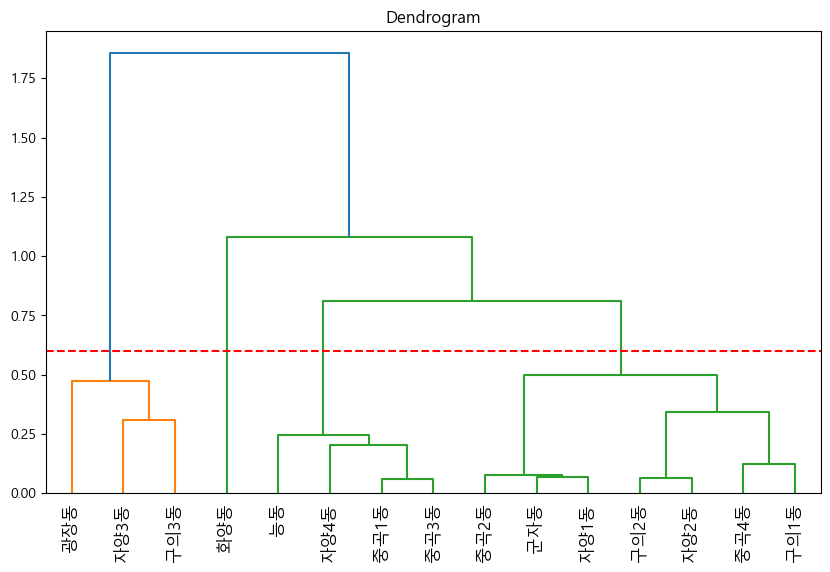

In [138]:
df_new_6_dd = df_new_6.copy()
df_new_6_dd['행정동'] = df_new['행정동']

df_new_6_dd.set_index('행정동', inplace=True)

# Min-Max 정규화 수행
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_new_6_dd)

df_normalized = pd.DataFrame(normalized_data, columns=df_new_6_dd.columns, index=df_new_6_dd.index)

# 계층적 군집 분석 수행
clusters = linkage(df_normalized, 
                   method = 'ward',
                   metric = 'euclidean')

# 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(Z = clusters, labels=df_new_6_dd.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.axhline(y = 0.6, color = 'r', linestyle = '--')
plt.show()

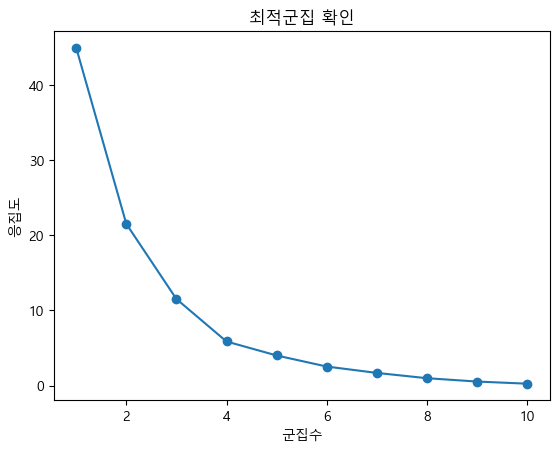

In [137]:
# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_new_6)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('군집수')
plt.ylabel('응집도')
plt.title('최적군집 확인')
plt.show()

In [139]:
# K-means 클러스터링
k = 4  # 선택한 K값
kmeans = KMeans(n_clusters=k, random_state=42)
df_new_6['cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터별 통계 정보 출력
cluster_stats = df_new_6.groupby('cluster').mean()
cluster_stats

,월평균소득금액,0~4세 인구,2030_상주인구수
cluster,,,
0,2.659965e+06,298.750000,5312.25
1,4.582739e+06,718.666667,8581.00
2,2.736481e+06,401.571429,7963.00
3,2.490675e+06,128.000000,12826.00


In [140]:
df_new_6.loc[df_new_3['cluster'] == 3, 'cluster'] = '4순위'
df_new_6.loc[df_new_3['cluster'] == 2, 'cluster'] = '1순위'
df_new_6.loc[df_new_3['cluster'] == 1, 'cluster'] = '3순위'
df_new_6.loc[df_new_3['cluster'] == 0, 'cluster'] = '2순위'

In [141]:
from sklearn.metrics import silhouette_score, silhouette_samples

df_new_6['행정동'] = df_new['행정동'].to_list()

silhouette_values = silhouette_samples(scaled_features, df_new_6['cluster'])

# 개별 실루엣 계수 
for i, silhouette in enumerate(silhouette_values):
    print(f"{df_new_6['행정동'][i]} 실루엣 계수: {round(silhouette,2)}")
print("")
# 전체 실루엣 계수
print(f"전체 실루엣 계수: {round(silhouette_score(scaled_features, df_new_6['cluster']), 2)}")

자양3동 실루엣 계수: 0.57
구의2동 실루엣 계수: 0.4
화양동 실루엣 계수: 0.0
군자동 실루엣 계수: 0.28
중곡1동 실루엣 계수: 0.65
중곡2동 실루엣 계수: 0.34
중곡3동 실루엣 계수: 0.65
중곡4동 실루엣 계수: 0.55
능동 실루엣 계수: 0.59
구의1동 실루엣 계수: 0.58
구의3동 실루엣 계수: 0.37
광장동 실루엣 계수: 0.54
자양1동 실루엣 계수: 0.42
자양2동 실루엣 계수: 0.45
자양4동 실루엣 계수: 0.46

전체 실루엣 계수: 0.46
